In [187]:
# Standard Imports
import numpy as np
import sympy as sp
from sympy import symbols, diff, solve, simplify, Eq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define symbolic variables
x, y = symbols('x y', real=True)

np.random.seed(42)
%matplotlib inline

---
## Question 1 (1 point)

**Which of the following is (are) the critical points of the scalar valued function $f(x, y) = 3x^2y + y^3 - 3x^2 - 3y^2 + 2$?**

Options:
- ☐ (0, 0)
- ☐ (0, 2)
- ☐ (1, 1)
- ☐ (1, 2)
- ☐ (0, 1)

### Solution

**Step 1: Understand Critical Points**

Critical points occur where the gradient equals zero:
$$\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = (0, 0)$$

**Step 2: Compute Partial Derivatives**

Given: $f(x, y) = 3x^2y + y^3 - 3x^2 - 3y^2 + 2$

In [188]:
# Define the function
f = 3*x**2*y + y**3 - 3*x**2 - 3*y**2 + 2

print("f(x, y) =", f)

# Compute partial derivatives
f_x = diff(f, x)
f_y = diff(f, y)

print("\n∂f/∂x =", f_x)
print("∂f/∂y =", f_y)

f(x, y) = 3*x**2*y - 3*x**2 + y**3 - 3*y**2 + 2

∂f/∂x = 6*x*y - 6*x
∂f/∂y = 3*x**2 + 3*y**2 - 6*y


**Step 3: Set partial derivatives to zero and solve**

$$\frac{\partial f}{\partial x} = 6xy - 6x = 6x(y - 1) = 0$$
$$\frac{\partial f}{\partial y} = 3x^2 + 3y^2 - 6y = 3(x^2 + y^2 - 2y) = 0$$

From the first equation: $x = 0$ OR $y = 1$

In [189]:
# Solve the system of equations
critical_points = solve([f_x, f_y], [x, y])

print("Critical Points:")
for point in critical_points:
    print(f"  ({point[0]}, {point[1]})")

Critical Points:
  (-1, 1)
  (0, 0)
  (0, 2)
  (1, 1)


In [190]:
# Verify each option
options = [(0, 0), (0, 2), (1, 1), (1, 2), (0, 1)]

print("Verification of each option:")
print("-" * 50)

for point in options:
    x_val, y_val = point
    fx_val = f_x.subs([(x, x_val), (y, y_val)])
    fy_val = f_y.subs([(x, x_val), (y, y_val)])
    
    is_critical = (fx_val == 0 and fy_val == 0)
    status = "✓ CRITICAL POINT" if is_critical else "✗ Not a critical point"
    
    print(f"Point {point}:")
    print(f"  ∂f/∂x = {fx_val}, ∂f/∂y = {fy_val}")
    print(f"  {status}")
    print()

Verification of each option:
--------------------------------------------------
Point (0, 0):
  ∂f/∂x = 0, ∂f/∂y = 0
  ✓ CRITICAL POINT

Point (0, 2):
  ∂f/∂x = 0, ∂f/∂y = 0
  ✓ CRITICAL POINT

Point (1, 1):
  ∂f/∂x = 0, ∂f/∂y = 0
  ✓ CRITICAL POINT

Point (1, 2):
  ∂f/∂x = 6, ∂f/∂y = 3
  ✗ Not a critical point

Point (0, 1):
  ∂f/∂x = 0, ∂f/∂y = -3
  ✗ Not a critical point



### Answer

The critical points are: **☑ (0, 0), ☑ (0, 2), ☑ (1, 1)**

**Explanation:**
- **(0, 0)**: ∂f/∂x = 0, ∂f/∂y = 0 ✓
- **(0, 2)**: ∂f/∂x = 0, ∂f/∂y = 0 ✓
- **(1, 1)**: ∂f/∂x = 0, ∂f/∂y = 0 ✓
- **(1, 2)**: ∂f/∂x = 6 ≠ 0 ✗
- **(0, 1)**: ∂f/∂y = -3 ≠ 0 ✗

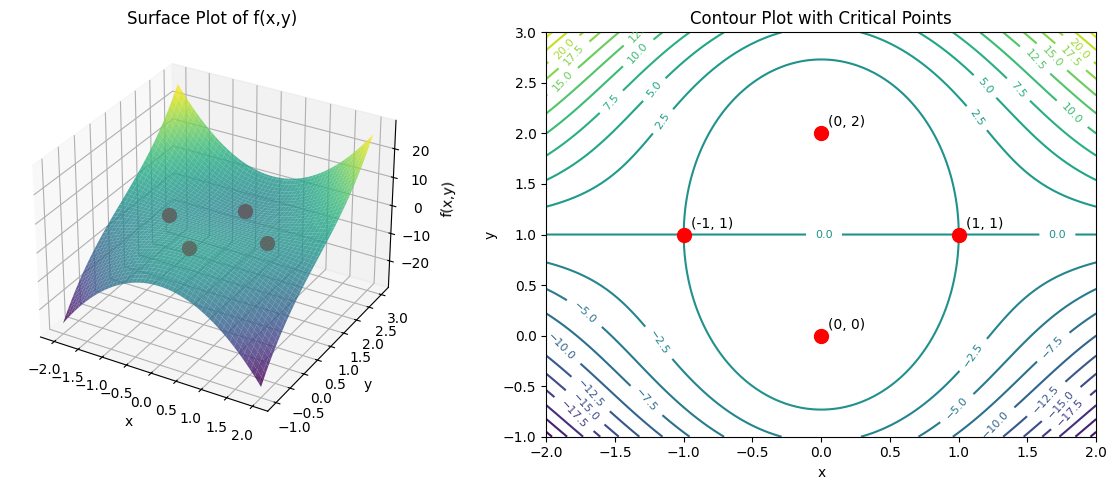

In [191]:
# Visualization of the function and critical points
from mpl_toolkits.mplot3d import Axes3D

# Create meshgrid
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute function values
Z = 3*X**2*Y + Y**3 - 3*X**2 - 3*Y**2 + 2

# Plot
fig = plt.figure(figsize=(12, 5))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('Surface Plot of f(x,y)')

# Mark critical points
critical_pts = [(0, 0), (0, 2), (1, 1), (-1, 1)]
for pt in critical_pts:
    z_val = 3*pt[0]**2*pt[1] + pt[1]**3 - 3*pt[0]**2 - 3*pt[1]**2 + 2
    ax1.scatter(pt[0], pt[1], z_val, color='red', s=100, marker='o')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
for pt in critical_pts:
    ax2.scatter(pt[0], pt[1], color='red', s=100, marker='o', zorder=5)
    ax2.annotate(f'{pt}', pt, textcoords='offset points', xytext=(5,5))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot with Critical Points')

plt.tight_layout()
plt.show()

---

## Question 2 (1 point)

**Consider a function $f : \mathbb{R}^2 \to \mathbb{R}$ defined as:**

$$f(x, y) = \begin{cases} \frac{xy^2}{x^2 + y^4}, & \text{if } (x, y) \neq (0, 0) \\ 0, & \text{otherwise} \end{cases}$$

**Which of the following is (are) true about $f(x, y)$?**

Options:
- ☐ The directional derivative at $(0, 0)$ in the direction of a unit vector $u = (u_1, u_2)$ is 1.
- ☐ The directional derivative at $(0, 0)$ in the direction of a unit vector $u = (u_1, u_2)$ is $\frac{u_2}{u_1}$, where $u_1$ is non-zero.
- ☐ Amongst all directional derivatives at $(0, 0)$, the maximum occurs in the direction of the vector $(5, 5)$.
- ☐ There is no plane which contains all the tangent lines at $(0, 0)$ and hence the tangent plane at $(0, 0)$ does not exist.

### Solution

**Step 1: Compute Directional Derivative at (0,0) from Definition**

The directional derivative at $(0,0)$ in direction $u = (u_1, u_2)$ is:

$$D_u f(0,0) = \lim_{t \to 0} \frac{f(tu_1, tu_2) - f(0,0)}{t}$$

**Step 2: Evaluate f along the direction**

For $(x, y) = (tu_1, tu_2)$ with $t \neq 0$:

$$f(tu_1, tu_2) = \frac{(tu_1)(tu_2)^2}{(tu_1)^2 + (tu_2)^4} = \frac{t^3 u_1 u_2^2}{t^2 u_1^2 + t^4 u_2^4}$$

$$= \frac{t^3 u_1 u_2^2}{t^2(u_1^2 + t^2 u_2^4)} = \frac{t \cdot u_1 u_2^2}{u_1^2 + t^2 u_2^4}$$

In [192]:
# Question 2: Directional Derivative Analysis
import sympy as sp
from sympy import symbols, limit, simplify, sqrt, oo

t, u1, u2 = symbols('t u1 u2', real=True)

# f(tu1, tu2) for t != 0
f_along_direction = (t * u1 * u2**2) / (u1**2 + t**2 * u2**4)

print("f(tu₁, tu₂) =", f_along_direction)

# Directional derivative = limit as t -> 0 of f(tu1, tu2) / t
# Since f(0,0) = 0, we have D_u f = lim (f(tu1, tu2) - 0) / t
directional_deriv = limit(f_along_direction / t, t, 0)

print("\nDirectional derivative D_u f(0,0):")
print("D_u f(0,0) =", directional_deriv)

f(tu₁, tu₂) = t*u1*u2**2/(t**2*u2**4 + u1**2)

Directional derivative D_u f(0,0):
D_u f(0,0) = u2**2/u1


**Step 3: Simplify the Directional Derivative**

$$D_u f(0,0) = \lim_{t \to 0} \frac{1}{t} \cdot \frac{t \cdot u_1 u_2^2}{u_1^2 + t^2 u_2^4} = \lim_{t \to 0} \frac{u_1 u_2^2}{u_1^2 + t^2 u_2^4} = \frac{u_1 u_2^2}{u_1^2} = \frac{u_2^2}{u_1}$$

(assuming $u_1 \neq 0$)

**Step 4: Verify Each Option**

In [193]:
# Verify each option

print("=" * 60)
print("OPTION ANALYSIS")
print("=" * 60)

# The directional derivative is u2^2 / u1 (for u1 != 0)
print("\n✓ D_u f(0,0) = u₂²/u₁ (when u₁ ≠ 0)")

# Option 1: Is it equal to 1?
print("\n--- Option 1: D_u f = 1 ? ---")
print("D_u f = u₂²/u₁ which depends on the direction, NOT always 1")
print("For example, if u = (1, 0), D_u f = 0")
print("If u = (1/√2, 1/√2), D_u f = (1/2) / (1/√2) = √2/2 ≈ 0.707")
print("❌ FALSE")

# Option 2: Is it u2/u1?
print("\n--- Option 2: D_u f = u₂/u₁ ? ---")
print("We derived D_u f = u₂²/u₁, NOT u₂/u₁")
print("❌ FALSE (Note: It's u₂² not u₂)")

# Option 3: Maximum in direction (5, 5)?
print("\n--- Option 3: Maximum in direction (5, 5) ? ---")
# For unit vector in direction (5,5): u = (1/√2, 1/√2)
u1_val = 1/np.sqrt(2)
u2_val = 1/np.sqrt(2)
D_55 = u2_val**2 / u1_val
print(f"For direction (5,5), unit vector = (1/√2, 1/√2)")
print(f"D_u f = (1/√2)² / (1/√2) = (1/2) / (1/√2) = 1/√2 ≈ {D_55:.4f}")
print("But D_u f = u₂²/u₁ can be arbitrarily large as u₁ → 0⁺")
print("For example, u = (ε, √(1-ε²)) → D_u f → ∞ as ε → 0")
print("❌ FALSE - there is NO maximum (unbounded)")

# Option 4: Tangent plane does not exist?
print("\n--- Option 4: Tangent plane does not exist ? ---")
print("The directional derivative D_u f = u₂²/u₁ depends nonlinearly on direction")
print("For tangent plane to exist, D_u f must equal ∇f · u = f_x u₁ + f_y u₂")
print("But u₂²/u₁ CANNOT be written as c₁u₁ + c₂u₂ for any constants c₁, c₂")
print("✅ TRUE - The tangent plane does NOT exist")

OPTION ANALYSIS

✓ D_u f(0,0) = u₂²/u₁ (when u₁ ≠ 0)

--- Option 1: D_u f = 1 ? ---
D_u f = u₂²/u₁ which depends on the direction, NOT always 1
For example, if u = (1, 0), D_u f = 0
If u = (1/√2, 1/√2), D_u f = (1/2) / (1/√2) = √2/2 ≈ 0.707
❌ FALSE

--- Option 2: D_u f = u₂/u₁ ? ---
We derived D_u f = u₂²/u₁, NOT u₂/u₁
❌ FALSE (Note: It's u₂² not u₂)

--- Option 3: Maximum in direction (5, 5) ? ---
For direction (5,5), unit vector = (1/√2, 1/√2)
D_u f = (1/√2)² / (1/√2) = (1/2) / (1/√2) = 1/√2 ≈ 0.7071
But D_u f = u₂²/u₁ can be arbitrarily large as u₁ → 0⁺
For example, u = (ε, √(1-ε²)) → D_u f → ∞ as ε → 0
❌ FALSE - there is NO maximum (unbounded)

--- Option 4: Tangent plane does not exist ? ---
The directional derivative D_u f = u₂²/u₁ depends nonlinearly on direction
For tangent plane to exist, D_u f must equal ∇f · u = f_x u₁ + f_y u₂
But u₂²/u₁ CANNOT be written as c₁u₁ + c₂u₂ for any constants c₁, c₂
✅ TRUE - The tangent plane does NOT exist


### Answer

**☑ There is no plane which contains all the tangent lines at $(0, 0)$ and hence the tangent plane at $(0, 0)$ does not exist.**

**Summary:**
| Option | Statement | Result |
|--------|-----------|--------|
| 1 | $D_u f = 1$ | ❌ FALSE |
| 2 | $D_u f = \frac{u_2}{u_1}$ | ❌ FALSE (it's $\frac{u_2^2}{u_1}$) |
| 3 | Maximum in direction $(5, 5)$ | ❌ FALSE (unbounded) |
| 4 | Tangent plane does not exist | ✅ TRUE |

**Key Insight:** The directional derivative $D_u f(0,0) = \frac{u_2^2}{u_1}$ is a nonlinear function of the direction components. For a tangent plane to exist, the directional derivatives must satisfy $D_u f = \nabla f \cdot u$ (linear in $u$). Since $\frac{u_2^2}{u_1}$ cannot be expressed as $au_1 + bu_2$, no tangent plane exists.

---

## Question 3 (1 point)

**Let $f : \mathbb{R}^3 \to \mathbb{R}$ be the function defined by $f(x, y, z) = 2x^3 + y^2 - z^3$, for all $(x, y, z) \in \mathbb{R}^3$. Choose all the directions along which there is no change in the function $f$ at the point $(1, 1, 1)$.**

Options:
- ☐ $\left(\frac{1}{\sqrt{5}}, 0, \frac{2}{\sqrt{5}}\right)$
- ☐ $\left(\frac{6}{7}, \frac{2}{7}, -\frac{3}{7}\right)$
- ☐ $\left(\frac{2}{\sqrt{6}}, \frac{1}{\sqrt{6}}, -\frac{1}{\sqrt{6}}\right)$
- ☐ $\left(0, \frac{3}{\sqrt{13}}, \frac{2}{\sqrt{13}}\right)$
- ☐ $\left(\frac{2}{\sqrt{17}}, -\frac{3}{\sqrt{17}}, \frac{2}{\sqrt{17}}\right)$

### Solution

**Step 1: Understand "No Change" Direction**

The function has **no change** in direction $\vec{u}$ when the directional derivative equals zero:
$$D_{\vec{u}} f = \nabla f \cdot \vec{u} = 0$$

This means $\vec{u}$ is **perpendicular to the gradient**.

**Step 2: Compute the Gradient**

$$f(x, y, z) = 2x^3 + y^2 - z^3$$

$$\nabla f = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}\right) = (6x^2, 2y, -3z^2)$$

**At point (1, 1, 1):**
$$\nabla f(1, 1, 1) = (6, 2, -3)$$

In [194]:
# Question 3: No change directions (perpendicular to gradient)
import sympy as sp
from sympy import symbols, diff, sqrt, Rational

x, y, z = symbols('x y z', real=True)

# Define f(x, y, z)
f3 = 2*x**3 + y**2 - z**3

# Compute gradient
grad_f = [diff(f3, var) for var in [x, y, z]]
print("f(x, y, z) =", f3)
print("∇f =", grad_f)

# Gradient at (1, 1, 1)
grad_at_point = [g.subs([(x, 1), (y, 1), (z, 1)]) for g in grad_f]
print("\n∇f(1, 1, 1) =", grad_at_point)

f(x, y, z) = 2*x**3 + y**2 - z**3
∇f = [6*x**2, 2*y, -3*z**2]

∇f(1, 1, 1) = [6, 2, -3]


In [195]:
# Check each option: D_u f = ∇f · u = 0 means no change
# ∇f(1,1,1) = (6, 2, -3)

gradient = np.array([6, 2, -3])

options_q3 = [
    ("Option 1", (1/np.sqrt(5), 0, 2/np.sqrt(5))),
    ("Option 2", (6/7, 2/7, -3/7)),
    ("Option 3", (2/np.sqrt(6), 1/np.sqrt(6), -1/np.sqrt(6))),
    ("Option 4", (0, 3/np.sqrt(13), 2/np.sqrt(13))),
    ("Option 5", (2/np.sqrt(17), -3/np.sqrt(17), 2/np.sqrt(17)))
]

print("∇f(1,1,1) = (6, 2, -3)")
print("\nChecking each direction for D_u f = ∇f · u = 0:")
print("=" * 60)

for name, u in options_q3:
    u_arr = np.array(u)
    dot_product = np.dot(gradient, u_arr)
    magnitude = np.linalg.norm(u_arr)
    
    is_no_change = np.isclose(dot_product, 0, atol=1e-10)
    status = "✅ NO CHANGE (perpendicular)" if is_no_change else "❌ Has change"
    
    print(f"\n{name}: u = ({u[0]:.4f}, {u[1]:.4f}, {u[2]:.4f})")
    print(f"  |u| = {magnitude:.4f}")
    print(f"  ∇f · u = 6({u[0]:.4f}) + 2({u[1]:.4f}) + (-3)({u[2]:.4f})")
    print(f"        = {6*u[0]:.4f} + {2*u[1]:.4f} + {-3*u[2]:.4f}")
    print(f"        = {dot_product:.6f}")
    print(f"  {status}")

∇f(1,1,1) = (6, 2, -3)

Checking each direction for D_u f = ∇f · u = 0:

Option 1: u = (0.4472, 0.0000, 0.8944)
  |u| = 1.0000
  ∇f · u = 6(0.4472) + 2(0.0000) + (-3)(0.8944)
        = 2.6833 + 0.0000 + -2.6833
        = 0.000000
  ✅ NO CHANGE (perpendicular)

Option 2: u = (0.8571, 0.2857, -0.4286)
  |u| = 1.0000
  ∇f · u = 6(0.8571) + 2(0.2857) + (-3)(-0.4286)
        = 5.1429 + 0.5714 + 1.2857
        = 7.000000
  ❌ Has change

Option 3: u = (0.8165, 0.4082, -0.4082)
  |u| = 1.0000
  ∇f · u = 6(0.8165) + 2(0.4082) + (-3)(-0.4082)
        = 4.8990 + 0.8165 + 1.2247
        = 6.940221
  ❌ Has change

Option 4: u = (0.0000, 0.8321, 0.5547)
  |u| = 1.0000
  ∇f · u = 6(0.0000) + 2(0.8321) + (-3)(0.5547)
        = 0.0000 + 1.6641 + -1.6641
        = 0.000000
  ✅ NO CHANGE (perpendicular)

Option 5: u = (0.4851, -0.7276, 0.4851)
  |u| = 1.0000
  ∇f · u = 6(0.4851) + 2(-0.7276) + (-3)(0.4851)
        = 2.9104 + -1.4552 + -1.4552
        = 0.000000
  ✅ NO CHANGE (perpendicular)


### Answer

**Directions with NO change in f at (1, 1, 1):**

☑ **$\left(\frac{1}{\sqrt{5}}, 0, \frac{2}{\sqrt{5}}\right)$** — ∇f · u = 6/√5 + 0 - 6/√5 = 0 ✓

☑ **$\left(0, \frac{3}{\sqrt{13}}, \frac{2}{\sqrt{13}}\right)$** — ∇f · u = 0 + 6/√13 - 6/√13 = 0 ✓

☑ **$\left(\frac{2}{\sqrt{17}}, -\frac{3}{\sqrt{17}}, \frac{2}{\sqrt{17}}\right)$** — ∇f · u = 12/√17 - 6/√17 - 6/√17 = 0 ✓

**Key Concept:** A direction has no change ⟺ direction is perpendicular to gradient ⟺ $\nabla f \cdot \vec{u} = 0$

---

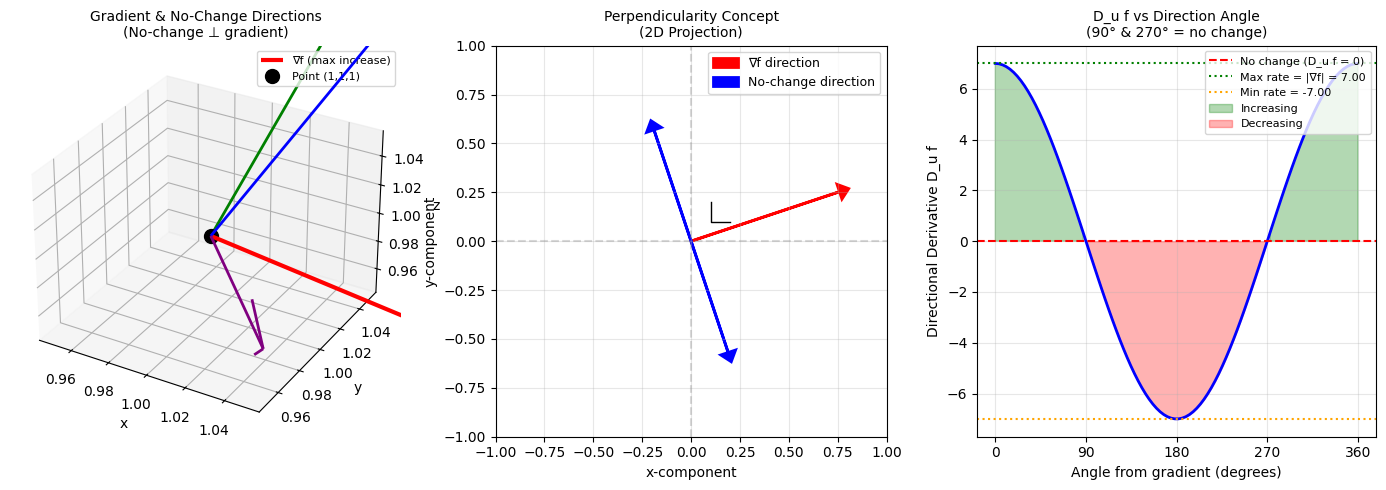


📊 Key insight: No change occurs when direction is perpendicular to gradient (cos 90° = 0)


In [196]:
# Visualization: Q3 - Gradient and No-Change Directions
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 5))

# Plot 1: 3D visualization of gradient and perpendicular directions
ax1 = fig.add_subplot(131, projection='3d')

# Gradient at (1,1,1)
gradient = np.array([6, 2, -3])
origin = np.array([1, 1, 1])

# Plot gradient vector (scaled for visibility)
scale = 0.15
ax1.quiver(origin[0], origin[1], origin[2], 
           gradient[0]*scale, gradient[1]*scale, gradient[2]*scale, 
           color='red', linewidth=3, arrow_length_ratio=0.2, label='∇f (max increase)')

# No-change directions (perpendicular to gradient)
no_change_dirs = [
    np.array([1/np.sqrt(5), 0, 2/np.sqrt(5)]),
    np.array([0, 3/np.sqrt(13), 2/np.sqrt(13)]),
    np.array([2/np.sqrt(17), -3/np.sqrt(17), 2/np.sqrt(17)])
]
colors = ['blue', 'green', 'purple']

for i, d in enumerate(no_change_dirs):
    ax1.quiver(origin[0], origin[1], origin[2], 
               d[0]*0.3, d[1]*0.3, d[2]*0.3, 
               color=colors[i], linewidth=2, arrow_length_ratio=0.15)

ax1.scatter(*origin, color='black', s=100, label='Point (1,1,1)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Gradient & No-Change Directions\n(No-change ⊥ gradient)', fontsize=10)
ax1.legend(fontsize=8)

# Plot 2: 2D projection showing perpendicularity
ax2 = fig.add_subplot(132)

# Project onto xy-plane (just for illustration)
grad_2d = gradient[:2] / np.linalg.norm(gradient[:2])
ax2.arrow(0, 0, grad_2d[0]*0.8, grad_2d[1]*0.8, head_width=0.08, head_length=0.05, 
          fc='red', ec='red', linewidth=2, label='∇f direction')

# Perpendicular direction in 2D
perp_2d = np.array([-grad_2d[1], grad_2d[0]])
ax2.arrow(0, 0, perp_2d[0]*0.6, perp_2d[1]*0.6, head_width=0.08, head_length=0.05, 
          fc='blue', ec='blue', linewidth=2, label='No-change direction')
ax2.arrow(0, 0, -perp_2d[0]*0.6, -perp_2d[1]*0.6, head_width=0.08, head_length=0.05, 
          fc='blue', ec='blue', linewidth=2)

# Draw perpendicular symbol
ax2.plot([0.1, 0.1, 0.2], [0.2, 0.1, 0.1], 'k-', linewidth=1)
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_aspect('equal')
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
ax2.set_xlabel('x-component')
ax2.set_ylabel('y-component')
ax2.set_title('Perpendicularity Concept\n(2D Projection)', fontsize=10)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Directional derivative as function of angle
ax3 = fig.add_subplot(133)

# For a unit circle of directions in a plane
theta = np.linspace(0, 2*np.pi, 100)
# Using directions in the xy-plane (z=0)
grad_mag = np.linalg.norm(gradient)
dir_deriv = grad_mag * np.cos(theta)  # D_u f = |∇f| cos(angle with gradient)

ax3.plot(np.degrees(theta), dir_deriv, 'b-', linewidth=2)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='No change (D_u f = 0)')
ax3.axhline(y=grad_mag, color='green', linestyle=':', linewidth=1.5, label=f'Max rate = |∇f| = {grad_mag:.2f}')
ax3.axhline(y=-grad_mag, color='orange', linestyle=':', linewidth=1.5, label=f'Min rate = -{grad_mag:.2f}')
ax3.fill_between(np.degrees(theta), 0, dir_deriv, where=(dir_deriv > 0), alpha=0.3, color='green', label='Increasing')
ax3.fill_between(np.degrees(theta), 0, dir_deriv, where=(dir_deriv < 0), alpha=0.3, color='red', label='Decreasing')
ax3.set_xlabel('Angle from gradient (degrees)', fontsize=10)
ax3.set_ylabel('Directional Derivative D_u f', fontsize=10)
ax3.set_title('D_u f vs Direction Angle\n(90° & 270° = no change)', fontsize=10)
ax3.set_xticks([0, 90, 180, 270, 360])
ax3.legend(fontsize=8, loc='upper right')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key insight: No change occurs when direction is perpendicular to gradient (cos 90° = 0)")

## Question 4 (1 point)

**Let $L_f(x, y) = Ax + By + C$ be the linear approximation to the function $f(x, y) = ye^x - \frac{1}{4}(x^2 + y^2)$ at $(0, 1)$. Then find the value of $A + 2B + 4C$.**

### Solution

**Step 1: Recall Linear Approximation Formula**

The linear approximation (tangent plane) at point $(a, b)$ is:
$$L_f(x, y) = f(a, b) + f_x(a, b)(x - a) + f_y(a, b)(y - b)$$

Expanding:
$$L_f(x, y) = f_x(a,b) \cdot x + f_y(a,b) \cdot y + \left[f(a,b) - a \cdot f_x(a,b) - b \cdot f_y(a,b)\right]$$

So: $A = f_x(a,b)$, $B = f_y(a,b)$, $C = f(a,b) - a \cdot f_x(a,b) - b \cdot f_y(a,b)$

**Step 2: Compute partial derivatives**

In [197]:
# Question 4: Linear Approximation
from sympy import symbols, diff, exp, Rational, simplify

x, y = symbols('x y', real=True)

# Define f(x, y) = y*e^x - (1/4)(x^2 + y^2)
f4 = y * exp(x) - Rational(1, 4) * (x**2 + y**2)

print("f(x, y) =", f4)

# Compute partial derivatives
f4_x = diff(f4, x)
f4_y = diff(f4, y)

print("\n∂f/∂x =", f4_x)
print("∂f/∂y =", f4_y)

f(x, y) = -x**2/4 - y**2/4 + y*exp(x)

∂f/∂x = -x/2 + y*exp(x)
∂f/∂y = -y/2 + exp(x)


In [198]:
# Evaluate at point (0, 1)
a, b = 0, 1

f_val = f4.subs([(x, a), (y, b)])
fx_val = f4_x.subs([(x, a), (y, b)])
fy_val = f4_y.subs([(x, a), (y, b)])

print("At point (0, 1):")
print(f"  f(0, 1) = {f_val}")
print(f"  f_x(0, 1) = {fx_val}")
print(f"  f_y(0, 1) = {fy_val}")

At point (0, 1):
  f(0, 1) = 3/4
  f_x(0, 1) = 1
  f_y(0, 1) = 1/2


In [199]:
# Compute A, B, C
# L_f(x, y) = f(a,b) + f_x(a,b)(x-a) + f_y(a,b)(y-b)
# L_f(x, y) = A*x + B*y + C

# Expanding: L_f = f_x*x + f_y*y + [f - a*f_x - b*f_y]
A = fx_val
B = fy_val
C = f_val - a * fx_val - b * fy_val

print("Linear Approximation L_f(x, y) = Ax + By + C")
print("=" * 50)
print(f"A = f_x(0, 1) = {A}")
print(f"B = f_y(0, 1) = {B}")
print(f"C = f(0,1) - 0·f_x - 1·f_y = {f_val} - {fy_val} = {C}")

# Calculate A + 2B + 4C
result = A + 2*B + 4*C

print("\n" + "=" * 50)
print(f"A + 2B + 4C = {A} + 2({B}) + 4({C})")
print(f"           = {A} + {2*B} + {4*C}")
print(f"           = {result}")
print("=" * 50)

Linear Approximation L_f(x, y) = Ax + By + C
A = f_x(0, 1) = 1
B = f_y(0, 1) = 1/2
C = f(0,1) - 0·f_x - 1·f_y = 3/4 - 1/2 = 1/4

A + 2B + 4C = 1 + 2(1/2) + 4(1/4)
           = 1 + 1 + 1
           = 3


### Step-by-Step Calculation

**Given:** $f(x, y) = ye^x - \frac{1}{4}(x^2 + y^2)$, point $(0, 1)$

**Partial Derivatives:**
$$f_x = ye^x - \frac{x}{2}$$
$$f_y = e^x - \frac{y}{2}$$

**At $(0, 1)$:**
- $f(0, 1) = 1 \cdot e^0 - \frac{1}{4}(0 + 1) = 1 - \frac{1}{4} = \frac{3}{4}$
- $f_x(0, 1) = 1 \cdot e^0 - 0 = 1$
- $f_y(0, 1) = e^0 - \frac{1}{2} = 1 - \frac{1}{2} = \frac{1}{2}$

**Linear Approximation:**
$$L_f(x, y) = f(0,1) + f_x(0,1)(x-0) + f_y(0,1)(y-1)$$
$$= \frac{3}{4} + 1 \cdot x + \frac{1}{2}(y - 1)$$
$$= \frac{3}{4} + x + \frac{1}{2}y - \frac{1}{2}$$
$$= x + \frac{1}{2}y + \frac{1}{4}$$

**Therefore:** $A = 1$, $B = \frac{1}{2}$, $C = \frac{1}{4}$

### Answer

$$A + 2B + 4C = 1 + 2 \cdot \frac{1}{2} + 4 \cdot \frac{1}{4} = 1 + 1 + 1 = \boxed{3}$$

---

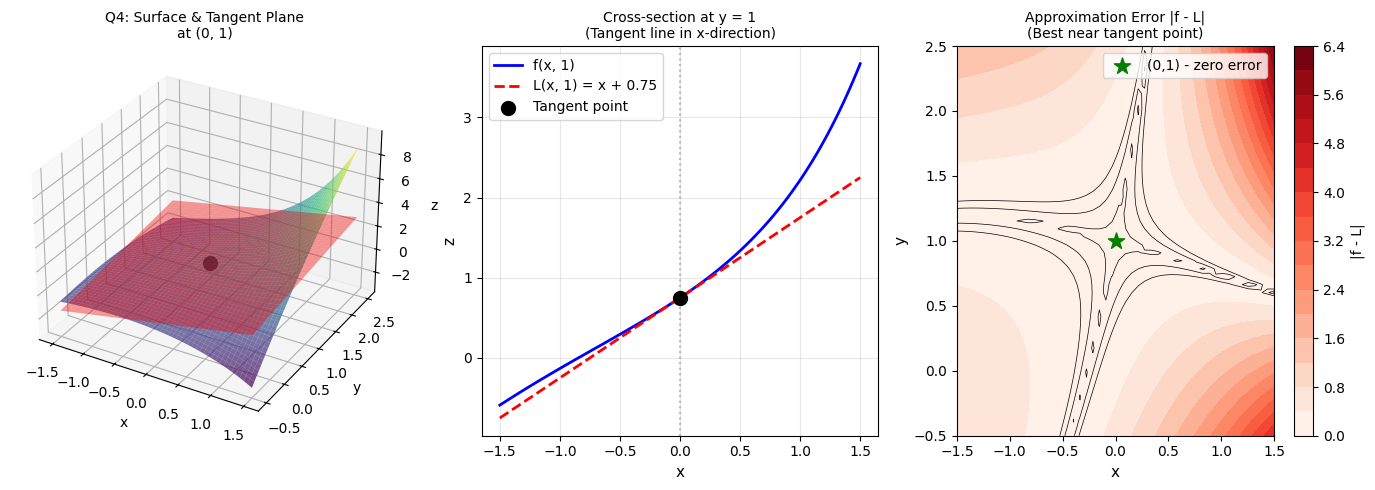


📊 Linear approximation L(x,y) = x + 0.5y + 0.25 is tangent to f at (0,1)


In [200]:
# Visualization: Q4 - Linear Approximation (Tangent Plane)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 5))

# Function: f(x,y) = y*e^x - (1/4)(x^2 + y^2)
def f_q4(x, y):
    return y * np.exp(x) - 0.25 * (x**2 + y**2)

# Linear approximation at (0, 1): L(x,y) = 1*x + 0.5*y + 0.25
def L_q4(x, y):
    return 1*x + 0.5*y + 0.25

# Create meshgrid
x_range = np.linspace(-1.5, 1.5, 50)
y_range = np.linspace(-0.5, 2.5, 50)
X, Y = np.meshgrid(x_range, y_range)
Z_f = f_q4(X, Y)
Z_L = L_q4(X, Y)

# Plot 1: 3D Surface with Tangent Plane
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z_f, cmap='viridis', alpha=0.7, label='f(x,y)')
ax1.plot_surface(X, Y, Z_L, color='red', alpha=0.4, label='L(x,y) tangent plane')
ax1.scatter([0], [1], [f_q4(0, 1)], color='black', s=100, zorder=10, label='Point (0,1)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Q4: Surface & Tangent Plane\nat (0, 1)', fontsize=10)

# Plot 2: Cross-section at y=1
ax2 = fig.add_subplot(132)
x_cross = np.linspace(-1.5, 1.5, 100)
z_f_cross = f_q4(x_cross, 1)
z_L_cross = L_q4(x_cross, 1)

ax2.plot(x_cross, z_f_cross, 'b-', linewidth=2, label='f(x, 1)')
ax2.plot(x_cross, z_L_cross, 'r--', linewidth=2, label='L(x, 1) = x + 0.75')
ax2.scatter([0], [f_q4(0, 1)], color='black', s=100, zorder=10, label='Tangent point')
ax2.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
ax2.set_xlabel('x', fontsize=11)
ax2.set_ylabel('z', fontsize=11)
ax2.set_title('Cross-section at y = 1\n(Tangent line in x-direction)', fontsize=10)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Approximation Error
ax3 = fig.add_subplot(133)
error = np.abs(Z_f - Z_L)
contour = ax3.contourf(X, Y, error, levels=15, cmap='Reds')
plt.colorbar(contour, ax=ax3, label='|f - L|')
ax3.scatter([0], [1], color='green', s=150, marker='*', zorder=10, label='(0,1) - zero error')
ax3.contour(X, Y, error, levels=[0.01, 0.05, 0.1], colors='black', linewidths=0.5)
ax3.set_xlabel('x', fontsize=11)
ax3.set_ylabel('y', fontsize=11)
ax3.set_title('Approximation Error |f - L|\n(Best near tangent point)', fontsize=10)
ax3.legend()

plt.tight_layout()
plt.show()

print("\n📊 Linear approximation L(x,y) = x + 0.5y + 0.25 is tangent to f at (0,1)")

## Question 5 (1 point)

**Consider a function $f(x, y) = 2\sqrt{x^2 + 4y}$. Let $S$ denote the set of unit vectors $u$ for which the directional derivative of $f$ at $(-2, 3)$ in the direction of $u$ is 0. Find the cardinality of the set $S$.**

### Solution

**Step 1: Understand the Problem**

We need to find unit vectors $u$ such that $D_u f(-2, 3) = 0$.

This means: $\nabla f \cdot u = 0$ (direction perpendicular to gradient)

**Step 2: Compute the Gradient**

$$f(x, y) = 2\sqrt{x^2 + 4y} = 2(x^2 + 4y)^{1/2}$$

In [201]:
# Question 5: Cardinality of zero directional derivative directions
from sympy import symbols, diff, sqrt, simplify

x, y = symbols('x y', real=True)

# Define f(x, y) = 2*sqrt(x^2 + 4y)
f5 = 2 * sqrt(x**2 + 4*y)

print("f(x, y) =", f5)

# Compute partial derivatives
f5_x = diff(f5, x)
f5_y = diff(f5, y)

print("\n∂f/∂x =", f5_x)
print("∂f/∂y =", f5_y)

# Simplify
f5_x_simplified = simplify(f5_x)
f5_y_simplified = simplify(f5_y)
print("\nSimplified:")
print("∂f/∂x =", f5_x_simplified)
print("∂f/∂y =", f5_y_simplified)

f(x, y) = 2*sqrt(x**2 + 4*y)

∂f/∂x = 2*x/sqrt(x**2 + 4*y)
∂f/∂y = 4/sqrt(x**2 + 4*y)

Simplified:
∂f/∂x = 2*x/sqrt(x**2 + 4*y)
∂f/∂y = 4/sqrt(x**2 + 4*y)


In [202]:
# Evaluate gradient at point (-2, 3)
point_x, point_y = -2, 3

fx_at_point = f5_x.subs([(x, point_x), (y, point_y)])
fy_at_point = f5_y.subs([(x, point_x), (y, point_y)])

print(f"At point ({point_x}, {point_y}):")
print(f"  x² + 4y = {point_x**2} + {4*point_y} = {point_x**2 + 4*point_y}")
print(f"  √(x² + 4y) = √{point_x**2 + 4*point_y} = {np.sqrt(point_x**2 + 4*point_y)}")
print()
print(f"  ∂f/∂x = 2x/√(x² + 4y) = 2({point_x})/√{point_x**2 + 4*point_y} = {fx_at_point}")
print(f"  ∂f/∂y = 4/√(x² + 4y) = 4/√{point_x**2 + 4*point_y} = {fy_at_point}")
print()
print(f"  ∇f({point_x}, {point_y}) = ({fx_at_point}, {fy_at_point})")

At point (-2, 3):
  x² + 4y = 4 + 12 = 16
  √(x² + 4y) = √16 = 4.0

  ∂f/∂x = 2x/√(x² + 4y) = 2(-2)/√16 = -1
  ∂f/∂y = 4/√(x² + 4y) = 4/√16 = 1

  ∇f(-2, 3) = (-1, 1)


In [203]:
# Check if gradient is zero or non-zero
grad_magnitude = np.sqrt(float(fx_at_point)**2 + float(fy_at_point)**2)

print("=" * 60)
print("ANALYSIS: Finding unit vectors u where ∇f · u = 0")
print("=" * 60)

if grad_magnitude == 0:
    print("\n∇f = (0, 0) - Gradient is ZERO!")
    print("Every direction gives D_u f = 0")
    print("Cardinality of S = INFINITE")
else:
    print(f"\n∇f = ({float(fx_at_point):.4f}, {float(fy_at_point):.4f})")
    print(f"|∇f| = {grad_magnitude:.4f} ≠ 0")
    print("\nGradient is NON-ZERO!")
    print("\nFor D_u f = ∇f · u = 0:")
    print("u must be PERPENDICULAR to ∇f")
    print("\nIn 2D, there are exactly 2 unit vectors perpendicular to any non-zero vector:")
    
    # The two perpendicular unit vectors
    grad = np.array([float(fx_at_point), float(fy_at_point)])
    perp1 = np.array([-grad[1], grad[0]]) / grad_magnitude
    perp2 = np.array([grad[1], -grad[0]]) / grad_magnitude
    
    print(f"  u₁ = ({perp1[0]:.4f}, {perp1[1]:.4f})")
    print(f"  u₂ = ({perp2[0]:.4f}, {perp2[1]:.4f})")
    
    # Verify
    print(f"\nVerification:")
    print(f"  ∇f · u₁ = {np.dot(grad, perp1):.10f} ≈ 0 ✓")
    print(f"  ∇f · u₂ = {np.dot(grad, perp2):.10f} ≈ 0 ✓")
    
    print("\n" + "=" * 60)
    print("CARDINALITY OF S = 2")
    print("=" * 60)

ANALYSIS: Finding unit vectors u where ∇f · u = 0

∇f = (-1.0000, 1.0000)
|∇f| = 1.4142 ≠ 0

Gradient is NON-ZERO!

For D_u f = ∇f · u = 0:
u must be PERPENDICULAR to ∇f

In 2D, there are exactly 2 unit vectors perpendicular to any non-zero vector:
  u₁ = (-0.7071, -0.7071)
  u₂ = (0.7071, 0.7071)

Verification:
  ∇f · u₁ = 0.0000000000 ≈ 0 ✓
  ∇f · u₂ = 0.0000000000 ≈ 0 ✓

CARDINALITY OF S = 2


### Answer

**Cardinality of S = $\boxed{2}$**

**Explanation:**

1. $f(x, y) = 2\sqrt{x^2 + 4y}$

2. $\nabla f = \left(\frac{2x}{\sqrt{x^2 + 4y}}, \frac{4}{\sqrt{x^2 + 4y}}\right)$

3. At $(-2, 3)$: $x^2 + 4y = 4 + 12 = 16$, so $\sqrt{16} = 4$
   - $\nabla f(-2, 3) = \left(\frac{-4}{4}, \frac{4}{4}\right) = (-1, 1)$

4. Since $\nabla f \neq (0, 0)$, the set of unit vectors perpendicular to $\nabla f$ in $\mathbb{R}^2$ has exactly **2 elements**:
   - $u_1 = \frac{1}{\sqrt{2}}(1, 1)$
   - $u_2 = \frac{1}{\sqrt{2}}(-1, -1)$

**Key Insight:** In 2D, if the gradient is non-zero, there are exactly 2 unit vectors perpendicular to it (pointing in opposite directions along the level curve).

---

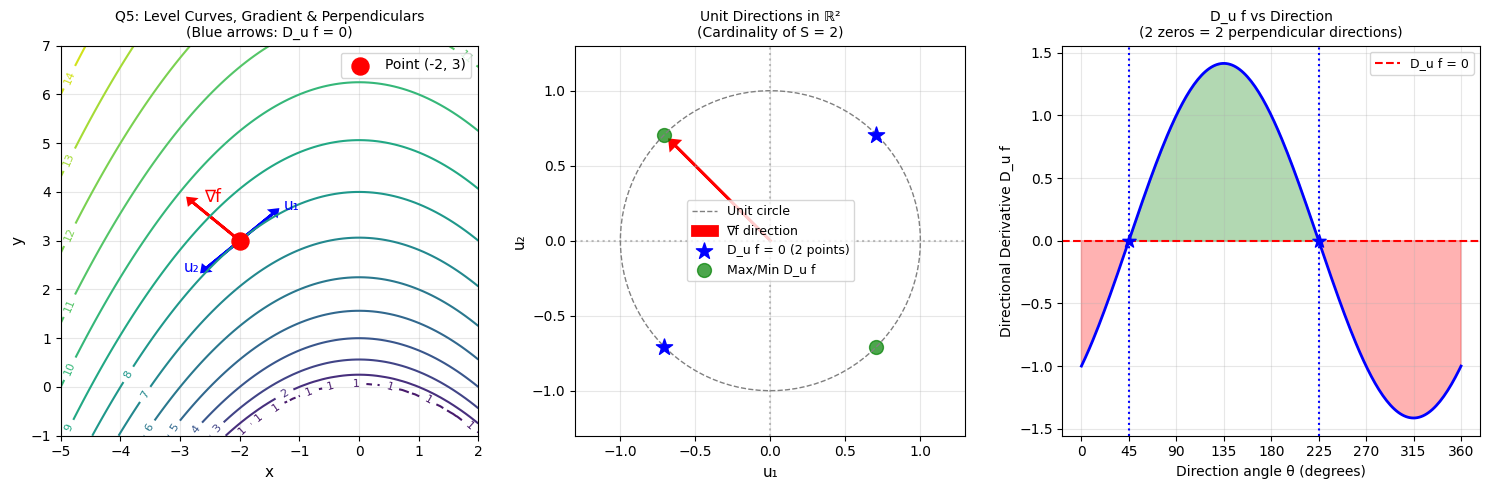


📊 In 2D, exactly 2 unit vectors are perpendicular to any non-zero gradient


In [204]:
# Visualization: Q5 - Zero Directional Derivative Directions
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Function f(x,y) = 2*sqrt(x^2 + 4y)
def f_q5(x, y):
    return 2 * np.sqrt(x**2 + 4*y)

# Gradient at (-2, 3): ∇f = (-1, 1)
point = (-2, 3)
gradient = np.array([-1, 1])

# Plot 1: Level curves and gradient
ax1 = axes[0]
x_range = np.linspace(-5, 2, 100)
y_range = np.linspace(-1, 7, 100)
X, Y = np.meshgrid(x_range, y_range)
# Handle domain: x^2 + 4y >= 0
Z = np.where(X**2 + 4*Y >= 0, 2*np.sqrt(np.maximum(X**2 + 4*Y, 0)), np.nan)

contour = ax1.contour(X, Y, Z, levels=15, cmap='viridis')
ax1.clabel(contour, inline=True, fontsize=8)
ax1.scatter(*point, color='red', s=150, zorder=10, label=f'Point {point}')

# Draw gradient arrow
scale = 0.8
ax1.arrow(point[0], point[1], gradient[0]*scale, gradient[1]*scale, 
          head_width=0.15, head_length=0.1, fc='red', ec='red', linewidth=2)
ax1.annotate('∇f', (point[0]+gradient[0]*scale+0.2, point[1]+gradient[1]*scale), fontsize=12, color='red')

# Draw perpendicular directions (where D_u f = 0)
perp = np.array([1, 1]) / np.sqrt(2)  # Perpendicular to (-1, 1)
ax1.arrow(point[0], point[1], perp[0]*0.8, perp[1]*0.8, 
          head_width=0.15, head_length=0.1, fc='blue', ec='blue', linewidth=2)
ax1.arrow(point[0], point[1], -perp[0]*0.8, -perp[1]*0.8, 
          head_width=0.15, head_length=0.1, fc='blue', ec='blue', linewidth=2)
ax1.annotate('u₁', (point[0]+perp[0]*0.9+0.1, point[1]+perp[1]*0.9), fontsize=11, color='blue')
ax1.annotate('u₂', (point[0]-perp[0]*0.9-0.3, point[1]-perp[1]*0.9), fontsize=11, color='blue')

ax1.set_xlabel('x', fontsize=11)
ax1.set_ylabel('y', fontsize=11)
ax1.set_title('Q5: Level Curves, Gradient & Perpendiculars\n(Blue arrows: D_u f = 0)', fontsize=10)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Unit circle of directions
ax2 = axes[1]
theta = np.linspace(0, 2*np.pi, 100)
ax2.plot(np.cos(theta), np.sin(theta), 'gray', linewidth=1, linestyle='--', label='Unit circle')

# Mark gradient direction
grad_unit = gradient / np.linalg.norm(gradient)
ax2.arrow(0, 0, grad_unit[0]*0.9, grad_unit[1]*0.9, head_width=0.08, head_length=0.05, 
          fc='red', ec='red', linewidth=2, label='∇f direction')

# Mark perpendicular directions (the 2 zero-derivative directions)
ax2.scatter([perp[0], -perp[0]], [perp[1], -perp[1]], color='blue', s=150, zorder=10, 
            marker='*', label='D_u f = 0 (2 points)')
ax2.scatter([grad_unit[0], -grad_unit[0]], [grad_unit[1], -grad_unit[1]], color='green', s=100, 
            marker='o', alpha=0.7, label='Max/Min D_u f')

ax2.set_xlim(-1.3, 1.3)
ax2.set_ylim(-1.3, 1.3)
ax2.set_aspect('equal')
ax2.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
ax2.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
ax2.set_xlabel('u₁', fontsize=11)
ax2.set_ylabel('u₂', fontsize=11)
ax2.set_title('Unit Directions in ℝ²\n(Cardinality of S = 2)', fontsize=10)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Directional derivative as function of angle
ax3 = axes[2]
theta = np.linspace(0, 2*np.pi, 200)
grad_mag = np.linalg.norm(gradient)

# Angle of gradient from positive x-axis
grad_angle = np.arctan2(gradient[1], gradient[0])

# D_u f = |∇f| * cos(θ - grad_angle)
D_u = grad_mag * np.cos(theta - grad_angle)

ax3.plot(np.degrees(theta), D_u, 'b-', linewidth=2)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='D_u f = 0')
ax3.fill_between(np.degrees(theta), 0, D_u, where=(D_u > 0), alpha=0.3, color='green')
ax3.fill_between(np.degrees(theta), 0, D_u, where=(D_u < 0), alpha=0.3, color='red')

# Mark the two zero crossings
zeros = [grad_angle + np.pi/2, grad_angle - np.pi/2]
for z in zeros:
    ax3.axvline(x=np.degrees(z) % 360, color='blue', linestyle=':', linewidth=1.5)
    ax3.scatter([np.degrees(z) % 360], [0], color='blue', s=100, marker='*', zorder=10)

ax3.set_xlabel('Direction angle θ (degrees)', fontsize=10)
ax3.set_ylabel('Directional Derivative D_u f', fontsize=10)
ax3.set_title('D_u f vs Direction\n(2 zeros = 2 perpendicular directions)', fontsize=10)
ax3.set_xticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 In 2D, exactly 2 unit vectors are perpendicular to any non-zero gradient")

## Question 6: Linear Approximation to Estimate Function Value

**Problem:** Suppose $f(x, y) = xye^x$ be a scalar valued multivariable function. Then using the linear approximation $L_f(x, y)$ of the function $f$ at $(1, 1)$, the estimate value of $f(1.2, 0.9)$ is found to be $\beta e$, where $\beta$ is a real number. The value of $\beta$ is ___?

### Solution Approach

**Linear Approximation Formula:**
$$L_f(x, y) = f(a, b) + f_x(a, b)(x - a) + f_y(a, b)(y - b)$$

**Given:**
- $f(x, y) = xye^x$
- Point of approximation: $(a, b) = (1, 1)$
- Estimate at: $(x, y) = (1.2, 0.9)$

**Steps:**
1. Compute $f(1, 1)$
2. Find partial derivatives $f_x$ and $f_y$
3. Evaluate $f_x(1, 1)$ and $f_y(1, 1)$
4. Construct $L_f(x, y)$
5. Calculate $L_f(1.2, 0.9)$
6. Express result as $\beta e$ and find $\beta$

In [205]:
import sympy as sp

# Define symbols
x, y = sp.symbols('x y')

# Define the function
f6 = x * y * sp.exp(x)

# Compute partial derivatives
f6_x = sp.diff(f6, x)
f6_y = sp.diff(f6, y)

print("f(x, y) =", f6)
print("\n∂f/∂x =", f6_x)
print("∂f/∂y =", f6_y)

f(x, y) = x*y*exp(x)

∂f/∂x = x*y*exp(x) + y*exp(x)
∂f/∂y = x*exp(x)


In [206]:
# Evaluate at point (1, 1)
a, b = 1, 1

f_at_point = f6.subs([(x, a), (y, b)])
fx_at_point = f6_x.subs([(x, a), (y, b)])
fy_at_point = f6_y.subs([(x, a), (y, b)])

print(f"At point ({a}, {b}):")
print(f"f(1, 1) = {f_at_point}")
print(f"f_x(1, 1) = {fx_at_point}")
print(f"f_y(1, 1) = {fy_at_point}")

At point (1, 1):
f(1, 1) = E
f_x(1, 1) = 2*E
f_y(1, 1) = E


In [207]:
# Construct linear approximation and evaluate at (1.2, 0.9)
x_val, y_val = sp.Rational(12, 10), sp.Rational(9, 10)  # Use exact fractions

# L_f(x,y) = f(a,b) + f_x(a,b)*(x-a) + f_y(a,b)*(y-b)
L_f = f_at_point + fx_at_point * (x_val - a) + fy_at_point * (y_val - b)

print(f"Linear approximation at (1.2, 0.9):")
print(f"L_f(1.2, 0.9) = {f_at_point} + {fx_at_point}*(1.2 - 1) + {fy_at_point}*(0.9 - 1)")
print(f"            = {f_at_point} + {fx_at_point}*(0.2) + {fy_at_point}*(-0.1)")
print(f"            = E + 2E*(1/5) + E*(-1/10)")
print(f"            = E + 2E/5 - E/10")
print(f"            = E(1 + 2/5 - 1/10)")
print(f"            = E(10/10 + 4/10 - 1/10)")
print(f"            = E(13/10)")
print(f"\nL_f(1.2, 0.9) = {sp.simplify(L_f)}")

Linear approximation at (1.2, 0.9):
L_f(1.2, 0.9) = E + 2*E*(1.2 - 1) + E*(0.9 - 1)
            = E + 2*E*(0.2) + E*(-0.1)
            = E + 2E*(1/5) + E*(-1/10)
            = E + 2E/5 - E/10
            = E(1 + 2/5 - 1/10)
            = E(10/10 + 4/10 - 1/10)
            = E(13/10)

L_f(1.2, 0.9) = 13*E/10


In [208]:
# Extract the coefficient β
E = sp.Symbol('E')
beta = sp.Rational(13, 10)

print(f"L_f(1.2, 0.9) = (13/10)e = βe")
print(f"\nβ = {beta} = {float(beta)}")

# Verify with actual computation
actual_f = float(1.2 * 0.9 * np.exp(1.2))
approx_f = float(beta) * np.e
print(f"\nVerification:")
print(f"Actual f(1.2, 0.9) = 1.2 × 0.9 × e^1.2 = {actual_f:.6f}")
print(f"Linear approximation = (13/10)e = {approx_f:.6f}")
print(f"Approximation error = {abs(actual_f - approx_f):.6f}")

L_f(1.2, 0.9) = (13/10)e = βe

β = 13/10 = 1.3

Verification:
Actual f(1.2, 0.9) = 1.2 × 0.9 × e^1.2 = 3.585726
Linear approximation = (13/10)e = 3.533766
Approximation error = 0.051960


### Answer

**$\beta = \boxed{\frac{13}{10}}$ or $\boxed{1.3}$**

**Step-by-step calculation:**

1. **Function:** $f(x, y) = xye^x$

2. **Partial Derivatives:**
   - $f_x = ye^x + xye^x = ye^x(1 + x)$
   - $f_y = xe^x$

3. **Evaluate at $(1, 1)$:**
   - $f(1, 1) = 1 \cdot 1 \cdot e^1 = e$
   - $f_x(1, 1) = 1 \cdot e \cdot (1 + 1) = 2e$
   - $f_y(1, 1) = 1 \cdot e = e$

4. **Linear Approximation:**
   $$L_f(x, y) = e + 2e(x - 1) + e(y - 1)$$

5. **Evaluate at $(1.2, 0.9)$:**
   $$L_f(1.2, 0.9) = e + 2e(0.2) + e(-0.1)$$
   $$= e + \frac{2e}{5} - \frac{e}{10}$$
   $$= e\left(1 + \frac{2}{5} - \frac{1}{10}\right)$$
   $$= e\left(\frac{10 + 4 - 1}{10}\right) = \frac{13e}{10}$$

6. **Therefore:** $L_f(1.2, 0.9) = \beta e$ where $\beta = \frac{13}{10} = 1.3$

---

## Questions 7-8: Temperature in a Solid Metal Sphere

**Context:** The temperature $T$ (in degree centigrade, $°C$) in a solid metal sphere is given by the function:
$$T(x, y, z) = e^{-(x^2 + y^2 + z^2)}$$

---

## Question 7: Rate of Change of Temperature (Multiple Correct)

**Choose the set of correct options:**

- [ ] The rate of change of temperature in the direction of X-axis is continuous at every point.
- [ ] The rate of change of temperature in the direction of Z-axis is not continuous at the origin.
- [ ] The rate of change of temperature at the origin from any direction is constant and that is 0.
- [ ] The rate of change of temperature at the origin from any direction is constant and that is $e$.
- [ ] The rate of change of temperature at the origin from any direction is not constant.

### Solution Approach

**Key Concepts:**
- Rate of change in X-direction = $\frac{\partial T}{\partial x}$ (partial derivative)
- Rate of change in Z-direction = $\frac{\partial T}{\partial z}$
- Rate of change at origin in any direction $\vec{u}$ = directional derivative $D_{\vec{u}}T(0,0,0)$

**We need to analyze:**
1. Continuity of partial derivatives
2. Directional derivative at the origin for arbitrary directions

In [209]:
import sympy as sp
import numpy as np

# Define symbols
x, y, z = sp.symbols('x y z')

# Define the temperature function
T = sp.exp(-(x**2 + y**2 + z**2))

# Compute partial derivatives
T_x = sp.diff(T, x)
T_y = sp.diff(T, y)
T_z = sp.diff(T, z)

print("Temperature function:")
print(f"T(x, y, z) = {T}")
print("\nPartial Derivatives:")
print(f"∂T/∂x = {T_x}")
print(f"∂T/∂y = {T_y}")
print(f"∂T/∂z = {T_z}")

Temperature function:
T(x, y, z) = exp(-x**2 - y**2 - z**2)

Partial Derivatives:
∂T/∂x = -2*x*exp(-x**2 - y**2 - z**2)
∂T/∂y = -2*y*exp(-x**2 - y**2 - z**2)
∂T/∂z = -2*z*exp(-x**2 - y**2 - z**2)


In [210]:
# Check Option 1: Is ∂T/∂x continuous everywhere?
# T_x = -2x * e^(-(x² + y² + z²))
# This is a product of polynomial and exponential functions - both continuous everywhere

print("Option 1: Rate of change in X-direction continuous at every point?")
print("=" * 60)
print(f"∂T/∂x = {T_x}")
print("\nAnalysis:")
print("- T_x = -2x × e^(-(x² + y² + z²))")
print("- Polynomial x is continuous everywhere")
print("- Exponential e^(-(x² + y² + z²)) is continuous everywhere")
print("- Product of continuous functions is continuous")
print("\n✓ CORRECT: The rate of change in X-direction IS continuous at every point.")

Option 1: Rate of change in X-direction continuous at every point?
∂T/∂x = -2*x*exp(-x**2 - y**2 - z**2)

Analysis:
- T_x = -2x × e^(-(x² + y² + z²))
- Polynomial x is continuous everywhere
- Exponential e^(-(x² + y² + z²)) is continuous everywhere
- Product of continuous functions is continuous

✓ CORRECT: The rate of change in X-direction IS continuous at every point.


In [211]:
# Check Option 2: Is ∂T/∂z NOT continuous at origin?
print("Option 2: Rate of change in Z-direction NOT continuous at origin?")
print("=" * 60)
print(f"∂T/∂z = {T_z}")
print("\nAnalysis:")
print("- T_z = -2z × e^(-(x² + y² + z²))")
print("- Same reasoning as T_x - product of continuous functions")
print("- At origin: T_z(0,0,0) =", T_z.subs([(x, 0), (y, 0), (z, 0)]))
print("\n✗ INCORRECT: T_z IS continuous everywhere, including at origin.")

Option 2: Rate of change in Z-direction NOT continuous at origin?
∂T/∂z = -2*z*exp(-x**2 - y**2 - z**2)

Analysis:
- T_z = -2z × e^(-(x² + y² + z²))
- Same reasoning as T_x - product of continuous functions
- At origin: T_z(0,0,0) = 0

✗ INCORRECT: T_z IS continuous everywhere, including at origin.


In [212]:
# Check Options 3, 4, 5: Directional derivative at origin
print("Options 3, 4, 5: Directional derivative at origin")
print("=" * 60)

# Gradient at origin
grad_T = [T_x, T_y, T_z]
grad_at_origin = [comp.subs([(x, 0), (y, 0), (z, 0)]) for comp in grad_T]
print(f"∇T at origin = {grad_at_origin}")

# Directional derivative D_u T = ∇T · u
# At origin: ∇T(0,0,0) = (0, 0, 0)
# So D_u T(0,0,0) = (0,0,0) · (u1, u2, u3) = 0 for ANY unit vector u

print("\nDirectional derivative formula: D_u T = ∇T · û")
print("At origin (0, 0, 0):")
print("  ∇T(0,0,0) = (0, 0, 0)")
print("\nFor ANY unit vector û = (u₁, u₂, u₃):")
print("  D_û T(0,0,0) = (0, 0, 0) · (u₁, u₂, u₃) = 0")
print("\n" + "=" * 60)
print("✓ CORRECT (Option 3): Rate of change at origin from ANY direction = 0")
print("✗ INCORRECT (Option 4): It's 0, not e")
print("✗ INCORRECT (Option 5): It IS constant (always 0)")

Options 3, 4, 5: Directional derivative at origin
∇T at origin = [0, 0, 0]

Directional derivative formula: D_u T = ∇T · û
At origin (0, 0, 0):
  ∇T(0,0,0) = (0, 0, 0)

For ANY unit vector û = (u₁, u₂, u₃):
  D_û T(0,0,0) = (0, 0, 0) · (u₁, u₂, u₃) = 0

✓ CORRECT (Option 3): Rate of change at origin from ANY direction = 0
✗ INCORRECT (Option 4): It's 0, not e
✗ INCORRECT (Option 5): It IS constant (always 0)


In [213]:
# Verify with specific directions at origin
print("Verification: Test several directions at origin")
print("=" * 60)

# Test various unit vectors
directions = [
    (1, 0, 0),    # X-axis
    (0, 1, 0),    # Y-axis
    (0, 0, 1),    # Z-axis
    (1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)),  # Diagonal
    (1/np.sqrt(2), 1/np.sqrt(2), 0),              # XY plane diagonal
]

for u in directions:
    # D_u T(0,0,0) = ∇T(0,0,0) · u = (0,0,0) · u = 0
    dir_deriv = sum([g * ui for g, ui in zip(grad_at_origin, u)])
    print(f"Direction {u}: D_u T(0,0,0) = {float(dir_deriv)}")

print("\n✓ All directional derivatives at origin = 0")

Verification: Test several directions at origin
Direction (1, 0, 0): D_u T(0,0,0) = 0.0
Direction (0, 1, 0): D_u T(0,0,0) = 0.0
Direction (0, 0, 1): D_u T(0,0,0) = 0.0
Direction (np.float64(0.5773502691896258), np.float64(0.5773502691896258), np.float64(0.5773502691896258)): D_u T(0,0,0) = 0.0
Direction (np.float64(0.7071067811865475), np.float64(0.7071067811865475), 0): D_u T(0,0,0) = 0.0

✓ All directional derivatives at origin = 0


### Answer for Question 7

**Correct Options:**
- ✅ **Option 1:** The rate of change of temperature in the direction of X-axis is continuous at every point.
- ✅ **Option 3:** The rate of change of temperature at the origin from any direction is constant and that is 0.

**Analysis Summary:**

| Option | Statement | Verdict | Reason |
|--------|-----------|---------|--------|
| 1 | $\frac{\partial T}{\partial x}$ continuous everywhere | ✓ CORRECT | Product of continuous functions |
| 2 | $\frac{\partial T}{\partial z}$ not continuous at origin | ✗ INCORRECT | It IS continuous |
| 3 | $D_{\vec{u}}T(0,0,0) = 0$ for all $\vec{u}$ | ✓ CORRECT | $\nabla T(0,0,0) = (0,0,0)$ |
| 4 | $D_{\vec{u}}T(0,0,0) = e$ for all $\vec{u}$ | ✗ INCORRECT | It's 0, not $e$ |
| 5 | $D_{\vec{u}}T(0,0,0)$ not constant | ✗ INCORRECT | It IS constant (= 0) |

**Key Insight:** At the origin, $\nabla T = (0, 0, 0)$, so the directional derivative in ANY direction is $\nabla T \cdot \vec{u} = 0$.

---

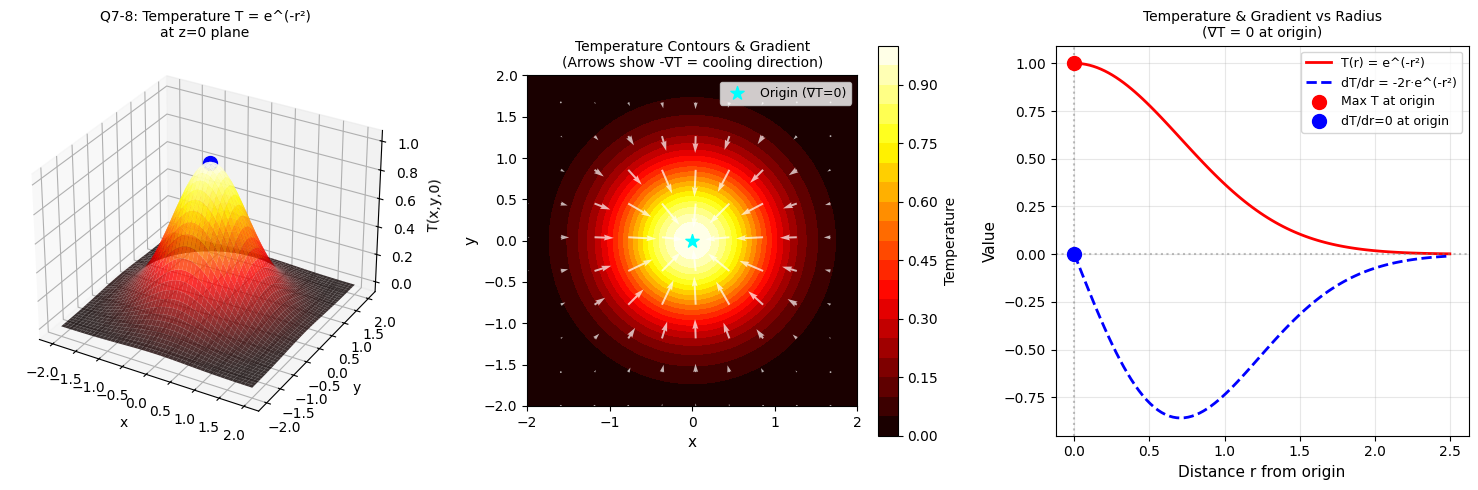


📊 Key insight: ∇T(0,0,0) = 0, so directional derivative is 0 in ALL directions at origin


In [214]:
# Visualization: Q7-8 - Temperature in Metal Sphere
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 5))

# Temperature function: T = e^(-(x² + y² + z²))
def T_func(x, y, z):
    return np.exp(-(x**2 + y**2 + z**2))

# Plot 1: 3D Temperature distribution (cross-section at z=0)
ax1 = fig.add_subplot(131, projection='3d')
x_range = np.linspace(-2, 2, 50)
y_range = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x_range, y_range)
Z_temp = T_func(X, Y, 0)

ax1.plot_surface(X, Y, Z_temp, cmap='hot', alpha=0.8)
ax1.scatter([0], [0], [1], color='blue', s=100, label='Origin: T=1 (max)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('T(x,y,0)')
ax1.set_title('Q7-8: Temperature T = e^(-r²)\nat z=0 plane', fontsize=10)

# Plot 2: Contour plot with gradient vectors
ax2 = fig.add_subplot(132)
contour = ax2.contourf(X, Y, Z_temp, levels=20, cmap='hot')
plt.colorbar(contour, ax=ax2, label='Temperature')

# Add gradient arrows (∇T = -2(x,y) * e^(-r²))
skip = 5
x_arrow = X[::skip, ::skip]
y_arrow = Y[::skip, ::skip]
# Gradient magnitude (avoid showing tiny arrows near origin)
grad_x = -2 * x_arrow * T_func(x_arrow, y_arrow, 0)
grad_y = -2 * y_arrow * T_func(x_arrow, y_arrow, 0)

ax2.quiver(x_arrow, y_arrow, grad_x, grad_y, color='white', alpha=0.7, scale=10)
ax2.scatter([0], [0], color='cyan', s=100, marker='*', zorder=10, label='Origin (∇T=0)')
ax2.set_xlabel('x', fontsize=11)
ax2.set_ylabel('y', fontsize=11)
ax2.set_title('Temperature Contours & Gradient\n(Arrows show -∇T = cooling direction)', fontsize=10)
ax2.legend(loc='upper right', fontsize=9)
ax2.set_aspect('equal')

# Plot 3: Temperature profile along radius and partial derivative
ax3 = fig.add_subplot(133)
r = np.linspace(0, 2.5, 100)
T_r = np.exp(-r**2)
dT_dr = -2 * r * np.exp(-r**2)  # Radial derivative

ax3.plot(r, T_r, 'r-', linewidth=2, label='T(r) = e^(-r²)')
ax3.plot(r, dT_dr, 'b--', linewidth=2, label='dT/dr = -2r·e^(-r²)')
ax3.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
ax3.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
ax3.scatter([0], [1], color='red', s=100, zorder=10, label='Max T at origin')
ax3.scatter([0], [0], color='blue', s=100, zorder=10, label='dT/dr=0 at origin')

ax3.set_xlabel('Distance r from origin', fontsize=11)
ax3.set_ylabel('Value', fontsize=11)
ax3.set_title('Temperature & Gradient vs Radius\n(∇T = 0 at origin)', fontsize=10)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key insight: ∇T(0,0,0) = 0, so directional derivative is 0 in ALL directions at origin")

## Question 8: Directional Derivative at a Specific Point

**Problem:** The rate of change of the temperature at point $(1, 0, 0)$ in the direction toward point $(8, 6, 0)$ is $A$. Find the value of $10Ae$.

**Same temperature function:** $T(x, y, z) = e^{-(x^2 + y^2 + z^2)}$

### Solution Approach

**Directional Derivative Formula:**
$$D_{\vec{u}}T = \nabla T \cdot \hat{u}$$

**Steps:**
1. Find direction vector from $(1, 0, 0)$ to $(8, 6, 0)$
2. Normalize to get unit vector $\hat{u}$
3. Compute $\nabla T$ at $(1, 0, 0)$
4. Calculate $D_{\hat{u}}T(1, 0, 0) = A$
5. Compute $10Ae$

In [215]:
import sympy as sp
import numpy as np

# Step 1: Find direction vector from (1,0,0) to (8,6,0)
P1 = np.array([1, 0, 0])  # Starting point
P2 = np.array([8, 6, 0])  # Target point

direction_vec = P2 - P1
print("Step 1: Direction vector")
print(f"From P1 = {P1} to P2 = {P2}")
print(f"Direction = P2 - P1 = {direction_vec}")

# Step 2: Normalize to get unit vector
magnitude_dir = np.linalg.norm(direction_vec)
unit_vec = direction_vec / magnitude_dir
print(f"\nStep 2: Unit vector")
print(f"|direction| = √(7² + 6² + 0²) = √(49 + 36) = √85 = {magnitude_dir:.6f}")
print(f"û = direction / |direction| = {direction_vec} / √85")
print(f"û = ({direction_vec[0]}/√85, {direction_vec[1]}/√85, {direction_vec[2]}/√85)")

Step 1: Direction vector
From P1 = [1 0 0] to P2 = [8 6 0]
Direction = P2 - P1 = [7 6 0]

Step 2: Unit vector
|direction| = √(7² + 6² + 0²) = √(49 + 36) = √85 = 9.219544
û = direction / |direction| = [7 6 0] / √85
û = (7/√85, 6/√85, 0/√85)


In [216]:
# Step 3: Compute gradient of T at (1, 0, 0)
# T = e^(-(x² + y² + z²))
# We already have T_x, T_y, T_z from Q7

# Evaluate gradient at (1, 0, 0)
point = (1, 0, 0)
T_x_at_point = T_x.subs([(x, 1), (y, 0), (z, 0)])
T_y_at_point = T_y.subs([(x, 1), (y, 0), (z, 0)])
T_z_at_point = T_z.subs([(x, 1), (y, 0), (z, 0)])

print("Step 3: Gradient at (1, 0, 0)")
print(f"∂T/∂x = {T_x} = -2x·e^(-(x²+y²+z²))")
print(f"∂T/∂y = {T_y} = -2y·e^(-(x²+y²+z²))")
print(f"∂T/∂z = {T_z} = -2z·e^(-(x²+y²+z²))")
print(f"\nAt (1, 0, 0):")
print(f"T_x(1,0,0) = -2(1)·e^(-1) = {T_x_at_point}")
print(f"T_y(1,0,0) = -2(0)·e^(-1) = {T_y_at_point}")
print(f"T_z(1,0,0) = -2(0)·e^(-1) = {T_z_at_point}")
print(f"\n∇T(1,0,0) = ({T_x_at_point}, {T_y_at_point}, {T_z_at_point})")

Step 3: Gradient at (1, 0, 0)
∂T/∂x = -2*x*exp(-x**2 - y**2 - z**2) = -2x·e^(-(x²+y²+z²))
∂T/∂y = -2*y*exp(-x**2 - y**2 - z**2) = -2y·e^(-(x²+y²+z²))
∂T/∂z = -2*z*exp(-x**2 - y**2 - z**2) = -2z·e^(-(x²+y²+z²))

At (1, 0, 0):
T_x(1,0,0) = -2(1)·e^(-1) = -2*exp(-1)
T_y(1,0,0) = -2(0)·e^(-1) = 0
T_z(1,0,0) = -2(0)·e^(-1) = 0

∇T(1,0,0) = (-2*exp(-1), 0, 0)


In [217]:
# Step 4: Calculate directional derivative A = ∇T · û
# ∇T(1,0,0) = (-2/e, 0, 0)
# û = (7/√85, 6/√85, 0)

# A = (-2/e)(7/√85) + (0)(6/√85) + (0)(0)
# A = -14/(e√85)

grad_at_point = np.array([float(T_x_at_point), float(T_y_at_point), float(T_z_at_point)])
A_numeric = np.dot(grad_at_point, unit_vec)

print("Step 4: Directional Derivative A = ∇T · û")
print(f"∇T(1,0,0) = (-2/e, 0, 0)")
print(f"û = (7/√85, 6/√85, 0)")
print(f"\nA = (-2/e) × (7/√85) + 0 × (6/√85) + 0 × 0")
print(f"A = -14/(e·√85)")
print(f"\nNumerically: A = {A_numeric:.10f}")

# Symbolic computation
import sympy as sp
sqrt_85 = sp.sqrt(85)
e_sym = sp.exp(1)
A_symbolic = sp.Rational(-14, 1) / (e_sym * sqrt_85)
print(f"\nSymbolically: A = {A_symbolic} = -14/(e·√85)")

Step 4: Directional Derivative A = ∇T · û
∇T(1,0,0) = (-2/e, 0, 0)
û = (7/√85, 6/√85, 0)

A = (-2/e) × (7/√85) + 0 × (6/√85) + 0 × 0
A = -14/(e·√85)

Numerically: A = -0.5586297892

Symbolically: A = -14*sqrt(85)*exp(-1)/85 = -14/(e·√85)


In [218]:
# Step 5: Compute 10Ae
# A = -14/(e·√85)
# 10Ae = 10 × (-14/(e·√85)) × e
# 10Ae = -140/√85

result_10Ae = 10 * A_symbolic * e_sym
result_simplified = sp.simplify(result_10Ae)

print("Step 5: Calculate 10Ae")
print(f"A = -14/(e·√85)")
print(f"\n10Ae = 10 × A × e")
print(f"     = 10 × (-14/(e·√85)) × e")
print(f"     = 10 × (-14/√85)")
print(f"     = -140/√85")

# Simplify
print(f"\nSimplified: 10Ae = {result_simplified}")
print(f"\nRationalizing: -140/√85 = -140√85/85 = -28√85/17")

# Numerical verification
numerical_result = float(result_simplified)
print(f"\nNumerical value: 10Ae = {numerical_result:.6f}")

# Alternative form
alt_form = sp.Rational(-140, 1) / sqrt_85
print(f"\nFinal Answer: 10Ae = -140/√85 = {float(alt_form):.6f}")

Step 5: Calculate 10Ae
A = -14/(e·√85)

10Ae = 10 × A × e
     = 10 × (-14/(e·√85)) × e
     = 10 × (-14/√85)
     = -140/√85

Simplified: 10Ae = -28*sqrt(85)/17

Rationalizing: -140/√85 = -140√85/85 = -28√85/17

Numerical value: 10Ae = -15.185132

Final Answer: 10Ae = -140/√85 = -15.185132


### Answer

**$10Ae = \boxed{-\frac{140}{\sqrt{85}}} = -\frac{28\sqrt{85}}{17} \approx -15.19$**

**Step-by-step calculation:**

1. **Direction vector:** $(8,6,0) - (1,0,0) = (7, 6, 0)$

2. **Unit vector:** $\hat{u} = \frac{(7, 6, 0)}{\sqrt{49 + 36}} = \left(\frac{7}{\sqrt{85}}, \frac{6}{\sqrt{85}}, 0\right)$

3. **Gradient at $(1, 0, 0)$:**
   - $\nabla T = \left(-2xe^{-(x^2+y^2+z^2)}, -2ye^{-(x^2+y^2+z^2)}, -2ze^{-(x^2+y^2+z^2)}\right)$
   - $\nabla T(1,0,0) = \left(-\frac{2}{e}, 0, 0\right)$

4. **Directional derivative:**
   $$A = \nabla T \cdot \hat{u} = -\frac{2}{e} \cdot \frac{7}{\sqrt{85}} + 0 + 0 = -\frac{14}{e\sqrt{85}}$$

5. **Final calculation:**
   $$10Ae = 10 \times \left(-\frac{14}{e\sqrt{85}}\right) \times e = -\frac{140}{\sqrt{85}}$$

---

## Question 9: Maximum Rate of Change Properties (Multiple Correct)

**Context:** Same temperature function $T(x, y, z) = e^{-(x^2 + y^2 + z^2)}$

**Which of the following statements are true?**

- [ ] At a point $(a, b, c)$ on the sphere the maximum rate of change in temperature is given by $2e^{-(a^2+b^2+c^2)}\sqrt{a^2 + b^2 + c^2}$
- [ ] At a point $(a, b, c)$ on the sphere the maximum rate of change in temperature is given by $-2e^{-(a^2+b^2+c^2)}\sqrt{a^2 + b^2 + c^2}$
- [ ] At a point $(a, b, c)$ on the sphere the maximum rate of change in temperature is in the direction of the unit vector $\left(-\frac{a}{\sqrt{a^2+b^2+c^2}}, -\frac{b}{\sqrt{a^2+b^2+c^2}}, -\frac{c}{\sqrt{a^2+b^2+c^2}}\right)$
- [ ] At a point $(a, b, c)$ on the sphere the maximum rate of change in temperature is in the direction of the unit vector $\left(-\frac{2a}{e^{a^2+b^2+c^2}}, -\frac{2b}{e^{a^2+b^2+c^2}}, -\frac{2c}{e^{a^2+b^2+c^2}}\right)$

### Solution Approach

**Key Facts:**
- Maximum rate of change = $|\nabla T|$ (magnitude of gradient)
- Direction of maximum increase = $\frac{\nabla T}{|\nabla T|}$ (unit gradient direction)
- $\nabla T = (-2xe^{-r^2}, -2ye^{-r^2}, -2ze^{-r^2})$ where $r^2 = x^2 + y^2 + z^2$

In [219]:
# Question 9: Analyze maximum rate of change
import sympy as sp

a, b, c = sp.symbols('a b c', real=True)

# Temperature function T = e^(-(x² + y² + z²))
# At point (a, b, c):
r_squared = a**2 + b**2 + c**2
T_at_abc = sp.exp(-r_squared)

# Gradient at (a, b, c)
grad_T_abc = [-2*a*sp.exp(-r_squared), -2*b*sp.exp(-r_squared), -2*c*sp.exp(-r_squared)]
print("Gradient at (a, b, c):")
print(f"∇T = ({grad_T_abc[0]}, {grad_T_abc[1]}, {grad_T_abc[2]})")
print(f"∇T = -2e^(-(a²+b²+c²)) × (a, b, c)")

# Magnitude of gradient (maximum rate of change)
grad_magnitude_sq = sum([comp**2 for comp in grad_T_abc])
grad_magnitude = sp.sqrt(sp.simplify(grad_magnitude_sq))
print(f"\n|∇T|² = {sp.simplify(grad_magnitude_sq)}")
print(f"|∇T| = {sp.simplify(grad_magnitude)}")
print(f"|∇T| = 2e^(-(a²+b²+c²)) × √(a² + b² + c²)")

Gradient at (a, b, c):
∇T = (-2*a*exp(-a**2 - b**2 - c**2), -2*b*exp(-a**2 - b**2 - c**2), -2*c*exp(-a**2 - b**2 - c**2))
∇T = -2e^(-(a²+b²+c²)) × (a, b, c)

|∇T|² = 4*(a**2 + b**2 + c**2)*exp(-2*a**2 - 2*b**2 - 2*c**2)
|∇T| = 2*sqrt(a**2 + b**2 + c**2)*exp(-a**2 - b**2 - c**2)
|∇T| = 2e^(-(a²+b²+c²)) × √(a² + b² + c²)


In [220]:
# Direction of maximum increase (unit vector in gradient direction)
r = sp.sqrt(a**2 + b**2 + c**2)
unit_grad = [comp / grad_magnitude for comp in grad_T_abc]
unit_grad_simplified = [sp.simplify(u) for u in unit_grad]

print("Direction of maximum INCREASE:")
print(f"∇T/|∇T| = {unit_grad_simplified}")
print(f"\nSimplified: (-a/√(a²+b²+c²), -b/√(a²+b²+c²), -c/√(a²+b²+c²))")

print("\n" + "=" * 60)
print("ANALYSIS OF OPTIONS:")
print("=" * 60)

print("\n✓ Option 1: Maximum rate = 2e^(-(a²+b²+c²))√(a²+b²+c²)")
print("  This is CORRECT - equals |∇T|")

print("\n✗ Option 2: Maximum rate = -2e^(-(a²+b²+c²))√(a²+b²+c²)")
print("  This is INCORRECT - magnitude is always positive")

print("\n✓ Option 3: Direction = (-a/r, -b/r, -c/r) where r = √(a²+b²+c²)")
print("  This is CORRECT - equals ∇T/|∇T|")

print("\n✗ Option 4: Direction = (-2a/e^r², -2b/e^r², -2c/e^r²)")
print("  This is INCORRECT - not a unit vector (not normalized)")

Direction of maximum INCREASE:
∇T/|∇T| = [-a/sqrt(a**2 + b**2 + c**2), -b/sqrt(a**2 + b**2 + c**2), -c/sqrt(a**2 + b**2 + c**2)]

Simplified: (-a/√(a²+b²+c²), -b/√(a²+b²+c²), -c/√(a²+b²+c²))

ANALYSIS OF OPTIONS:

✓ Option 1: Maximum rate = 2e^(-(a²+b²+c²))√(a²+b²+c²)
  This is CORRECT - equals |∇T|

✗ Option 2: Maximum rate = -2e^(-(a²+b²+c²))√(a²+b²+c²)
  This is INCORRECT - magnitude is always positive

✓ Option 3: Direction = (-a/r, -b/r, -c/r) where r = √(a²+b²+c²)
  This is CORRECT - equals ∇T/|∇T|

✗ Option 4: Direction = (-2a/e^r², -2b/e^r², -2c/e^r²)
  This is INCORRECT - not a unit vector (not normalized)


### Answer for Question 9

**Correct Options: 1 and 3**

| Option | Statement | Verdict |
|--------|-----------|---------|
| 1 | Max rate = $2e^{-(a^2+b^2+c^2)}\sqrt{a^2+b^2+c^2}$ | ✓ CORRECT |
| 2 | Max rate = $-2e^{-(a^2+b^2+c^2)}\sqrt{a^2+b^2+c^2}$ | ✗ INCORRECT (magnitude ≥ 0) |
| 3 | Direction = $\left(-\frac{a}{r}, -\frac{b}{r}, -\frac{c}{r}\right)$ | ✓ CORRECT |
| 4 | Direction = $\left(-\frac{2a}{e^{r^2}}, -\frac{2b}{e^{r^2}}, -\frac{2c}{e^{r^2}}\right)$ | ✗ INCORRECT (not unit vector) |

**Key insight:** The gradient points radially inward (toward origin), which makes sense since temperature decreases as you move away from the origin.

---

## Question 10: Maximum Directional Derivative

**Problem:** Find out the maximum directional derivative at $(0,0)$ of the function $f_1(x, y) = y^3 e^{6x}$.

In [221]:
# Question 10: f1(x,y) = y³e^(6x), find max directional derivative at (0,0)
import sympy as sp

x, y = sp.symbols('x y')
f1 = y**3 * sp.exp(6*x)

# Gradient
f1_x = sp.diff(f1, x)
f1_y = sp.diff(f1, y)

print("Question 10: f₁(x, y) = y³e^(6x)")
print(f"∂f₁/∂x = {f1_x}")
print(f"∂f₁/∂y = {f1_y}")

# Evaluate at (0, 0)
f1_x_at_0 = f1_x.subs([(x, 0), (y, 0)])
f1_y_at_0 = f1_y.subs([(x, 0), (y, 0)])

print(f"\nAt (0, 0):")
print(f"∂f₁/∂x(0,0) = {f1_x_at_0}")
print(f"∂f₁/∂y(0,0) = {f1_y_at_0}")
print(f"∇f₁(0,0) = ({f1_x_at_0}, {f1_y_at_0})")

# Maximum directional derivative = |∇f|
max_dir_deriv = sp.sqrt(f1_x_at_0**2 + f1_y_at_0**2)
print(f"\nMax directional derivative = |∇f₁(0,0)| = √({f1_x_at_0}² + {f1_y_at_0}²) = {max_dir_deriv}")
print(f"\n✓ Answer: {max_dir_deriv}")

Question 10: f₁(x, y) = y³e^(6x)
∂f₁/∂x = 6*y**3*exp(6*x)
∂f₁/∂y = 3*y**2*exp(6*x)

At (0, 0):
∂f₁/∂x(0,0) = 0
∂f₁/∂y(0,0) = 0
∇f₁(0,0) = (0, 0)

Max directional derivative = |∇f₁(0,0)| = √(0² + 0²) = 0

✓ Answer: 0


### Answer: $\boxed{0}$

At $(0,0)$: $\nabla f_1 = (0, 0)$, so max directional derivative = $|\nabla f_1| = 0$

---

## Question 11: Maximum Directional Derivative

**Problem:** Find out the maximum directional derivative at $(0,0)$ of the function $f_2(x, y) = 5 - 4x^2 + 6x - 2y^2$.

In [222]:
# Question 11: f2(x,y) = 5 - 4x² + 6x - 2y², find max directional derivative at (0,0)
f2 = 5 - 4*x**2 + 6*x - 2*y**2

f2_x = sp.diff(f2, x)
f2_y = sp.diff(f2, y)

print("Question 11: f₂(x, y) = 5 - 4x² + 6x - 2y²")
print(f"∂f₂/∂x = {f2_x}")
print(f"∂f₂/∂y = {f2_y}")

# Evaluate at (0, 0)
f2_x_at_0 = f2_x.subs([(x, 0), (y, 0)])
f2_y_at_0 = f2_y.subs([(x, 0), (y, 0)])

print(f"\nAt (0, 0):")
print(f"∂f₂/∂x(0,0) = {f2_x_at_0}")
print(f"∂f₂/∂y(0,0) = {f2_y_at_0}")
print(f"∇f₂(0,0) = ({f2_x_at_0}, {f2_y_at_0})")

# Maximum directional derivative = |∇f|
max_dir_deriv_11 = sp.sqrt(f2_x_at_0**2 + f2_y_at_0**2)
print(f"\nMax directional derivative = |∇f₂(0,0)| = √({f2_x_at_0}² + {f2_y_at_0}²) = {max_dir_deriv_11}")
print(f"\n✓ Answer: {max_dir_deriv_11}")

Question 11: f₂(x, y) = 5 - 4x² + 6x - 2y²
∂f₂/∂x = 6 - 8*x
∂f₂/∂y = -4*y

At (0, 0):
∂f₂/∂x(0,0) = 6
∂f₂/∂y(0,0) = 0
∇f₂(0,0) = (6, 0)

Max directional derivative = |∇f₂(0,0)| = √(6² + 0²) = 6

✓ Answer: 6


### Answer: $\boxed{6}$

At $(0,0)$: $\nabla f_2 = (6, 0)$, so max directional derivative = $|\nabla f_2| = 6$

---

## Question 12: Maximum Directional Derivative

**Problem:** Find out the maximum directional derivative at $(0,0)$ of the function $f_3(x, y) = 6x\sin(5x) + 5y\cos(6y)$.

In [223]:
# Question 12: f3(x,y) = 6x·sin(5x) + 5y·cos(6y), find max directional derivative at (0,0)
f3_new = 6*x*sp.sin(5*x) + 5*y*sp.cos(6*y)

f3_x = sp.diff(f3_new, x)
f3_y = sp.diff(f3_new, y)

print("Question 12: f₃(x, y) = 6x·sin(5x) + 5y·cos(6y)")
print(f"∂f₃/∂x = {f3_x}")
print(f"∂f₃/∂y = {f3_y}")

# Evaluate at (0, 0)
f3_x_at_0 = f3_x.subs([(x, 0), (y, 0)])
f3_y_at_0 = f3_y.subs([(x, 0), (y, 0)])

print(f"\nAt (0, 0):")
print(f"∂f₃/∂x(0,0) = 6·sin(0) + 30·0·cos(0) = {f3_x_at_0}")
print(f"∂f₃/∂y(0,0) = 5·cos(0) - 30·0·sin(0) = {f3_y_at_0}")
print(f"∇f₃(0,0) = ({f3_x_at_0}, {f3_y_at_0})")

# Maximum directional derivative = |∇f|
max_dir_deriv_12 = sp.sqrt(f3_x_at_0**2 + f3_y_at_0**2)
print(f"\nMax directional derivative = |∇f₃(0,0)| = √({f3_x_at_0}² + {f3_y_at_0}²) = {max_dir_deriv_12}")
print(f"\n✓ Answer: {max_dir_deriv_12}")

Question 12: f₃(x, y) = 6x·sin(5x) + 5y·cos(6y)
∂f₃/∂x = 30*x*cos(5*x) + 6*sin(5*x)
∂f₃/∂y = -30*y*sin(6*y) + 5*cos(6*y)

At (0, 0):
∂f₃/∂x(0,0) = 6·sin(0) + 30·0·cos(0) = 0
∂f₃/∂y(0,0) = 5·cos(0) - 30·0·sin(0) = 5
∇f₃(0,0) = (0, 5)

Max directional derivative = |∇f₃(0,0)| = √(0² + 5²) = 5

✓ Answer: 5


### Answer: $\boxed{5}$

At $(0,0)$: $\nabla f_3 = (0, 5)$, so max directional derivative = $|\nabla f_3| = 5$

---

## Question 13: Tangent Plane Equation

**Problem:** The equation of the tangent plane to the surface $z = 3 - x^5 - y^2$ at the point $(1, 1, 1)$ is $z = Ax + By + C$. Find the value of $C - A - B$.

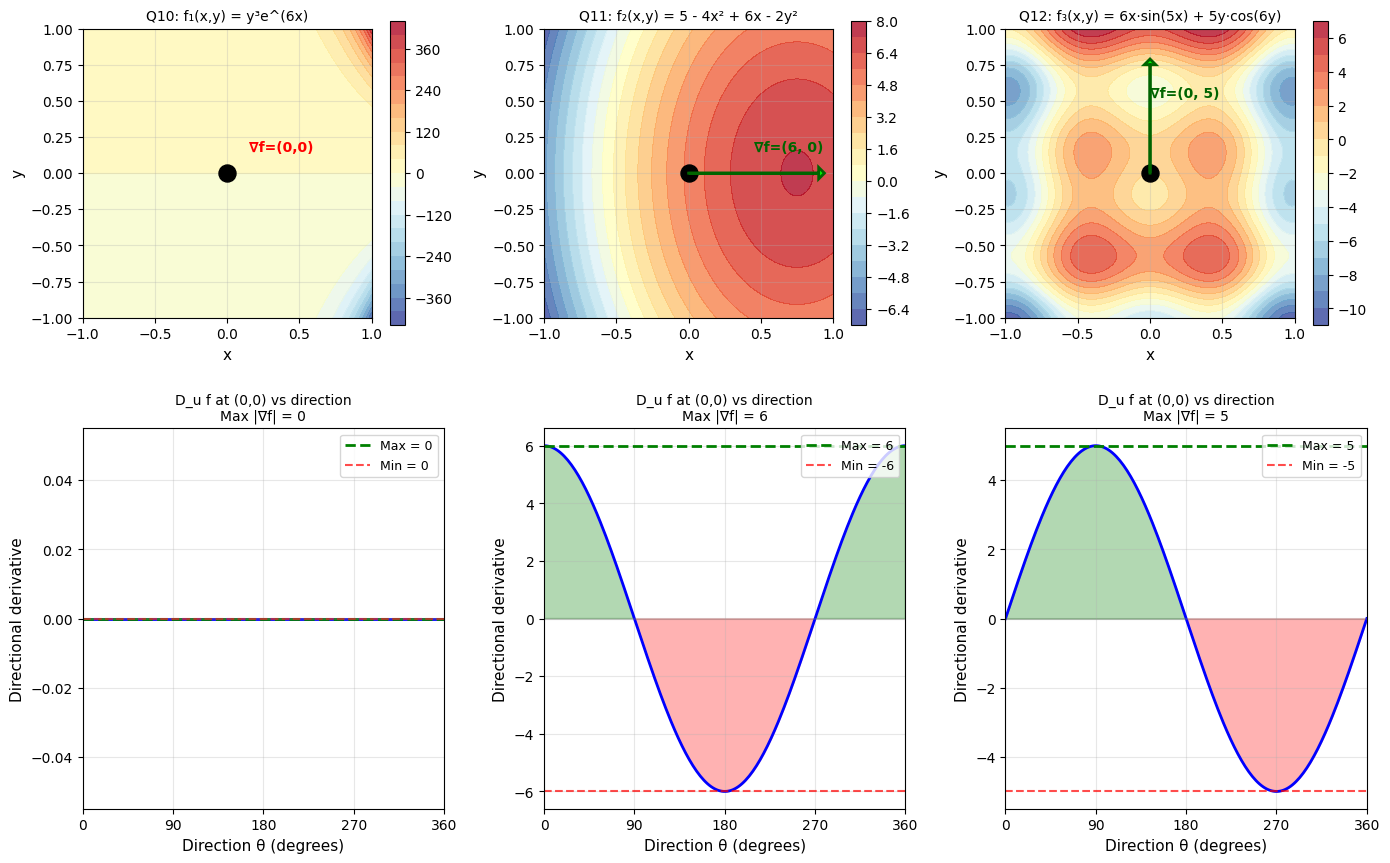


📊 Summary: Max directional derivative = |∇f| at each point
   Q10: |∇f₁(0,0)| = |(0,0)| = 0
   Q11: |∇f₂(0,0)| = |(6,0)| = 6
   Q12: |∇f₃(0,0)| = |(0,5)| = 5


In [227]:
# Visualization: Q10-12 - Maximum Directional Derivatives Comparison
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(14, 9))

# Function definitions
def f1(x, y):
    return y**3 * np.exp(6*x)

def f2(x, y):
    return 5 - 4*x**2 + 6*x - 2*y**2

def f3(x, y):
    return 6*x*np.sin(5*x) + 5*y*np.cos(6*y)

# Data for each function
functions = [
    {'name': 'Q10: f₁(x,y) = y³e^(6x)', 'func': f1, 'grad': (0, 0), 'max_dd': 0},
    {'name': 'Q11: f₂(x,y) = 5 - 4x² + 6x - 2y²', 'func': f2, 'grad': (6, 0), 'max_dd': 6},
    {'name': 'Q12: f₃(x,y) = 6x·sin(5x) + 5y·cos(6y)', 'func': f3, 'grad': (0, 5), 'max_dd': 5}
]

x_range = np.linspace(-1, 1, 100)
y_range = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_range, y_range)

# Row 1: Contour plots with gradient vectors
for i, f_info in enumerate(functions):
    ax = axes[0, i]
    Z = f_info['func'](X, Y)
    
    # Handle NaN/Inf values for f1
    Z = np.clip(Z, -1e10, 1e10)
    Z = np.nan_to_num(Z, nan=0, posinf=0, neginf=0)
    
    contour = ax.contourf(X, Y, Z, levels=20, cmap='RdYlBu_r', alpha=0.8)
    plt.colorbar(contour, ax=ax, shrink=0.8)
    
    # Mark origin
    ax.scatter([0], [0], color='black', s=150, zorder=10, label='(0,0)')
    
    # Draw gradient if non-zero
    gx, gy = f_info['grad']
    if gx != 0 or gy != 0:
        scale = 0.15
        ax.arrow(0, 0, gx*scale, gy*scale, head_width=0.08, head_length=0.04,
                fc='lime', ec='darkgreen', linewidth=2, zorder=11)
        ax.text(gx*scale*0.5, gy*scale*0.5 + 0.15, f'∇f={f_info["grad"]}', 
               fontsize=10, color='darkgreen', fontweight='bold')
    else:
        ax.text(0.15, 0.15, '∇f=(0,0)', fontsize=10, color='red', fontweight='bold')
    
    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('y', fontsize=11)
    ax.set_title(f_info['name'], fontsize=10)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

# Row 2: Directional derivative as function of direction
theta = np.linspace(0, 2*np.pi, 200)

for i, f_info in enumerate(functions):
    ax = axes[1, i]
    
    gx, gy = f_info['grad']
    grad_mag = np.sqrt(gx**2 + gy**2)
    
    # Directional derivative D_u f = ∇f · u = |∇f| cos(θ - θ_grad)
    if grad_mag > 0:
        theta_grad = np.arctan2(gy, gx)
        dd = grad_mag * np.cos(theta - theta_grad)
    else:
        dd = np.zeros_like(theta)
    
    ax.plot(theta * 180/np.pi, dd, 'b-', linewidth=2)
    ax.axhline(y=f_info['max_dd'], color='green', linestyle='--', linewidth=2, 
               label=f'Max = {f_info["max_dd"]}')
    ax.axhline(y=-f_info['max_dd'], color='red', linestyle='--', linewidth=1.5, alpha=0.7,
               label=f'Min = {-f_info["max_dd"]}')
    ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    
    ax.fill_between(theta * 180/np.pi, 0, dd, where=(dd > 0), alpha=0.3, color='green')
    ax.fill_between(theta * 180/np.pi, 0, dd, where=(dd < 0), alpha=0.3, color='red')
    
    ax.set_xlabel('Direction θ (degrees)', fontsize=11)
    ax.set_ylabel('Directional derivative', fontsize=11)
    ax.set_title(f'D_u f at (0,0) vs direction\nMax |∇f| = {f_info["max_dd"]}', fontsize=10)
    ax.set_xlim(0, 360)
    ax.set_xticks([0, 90, 180, 270, 360])
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Summary: Max directional derivative = |∇f| at each point")
print("   Q10: |∇f₁(0,0)| = |(0,0)| = 0")
print("   Q11: |∇f₂(0,0)| = |(6,0)| = 6")
print("   Q12: |∇f₃(0,0)| = |(0,5)| = 5")

In [224]:
# Question 13: Tangent plane to z = 3 - x⁵ - y² at (1, 1, 1)
# Tangent plane: z = Ax + By + C, find C - A - B

z_func = 3 - x**5 - y**2

# Partial derivatives
z_x = sp.diff(z_func, x)
z_y = sp.diff(z_func, y)

print("Question 13: Surface z = 3 - x⁵ - y²")
print(f"∂z/∂x = {z_x}")
print(f"∂z/∂y = {z_y}")

# At point (1, 1)
z_x_at_point = z_x.subs([(x, 1), (y, 1)])
z_y_at_point = z_y.subs([(x, 1), (y, 1)])
z_at_point = z_func.subs([(x, 1), (y, 1)])

print(f"\nAt (1, 1):")
print(f"z(1,1) = 3 - 1 - 1 = {z_at_point}")
print(f"∂z/∂x(1,1) = {z_x_at_point}")
print(f"∂z/∂y(1,1) = {z_y_at_point}")

# Tangent plane formula: z - z₀ = zₓ(x - x₀) + zᵧ(y - y₀)
# z = z₀ + zₓ(x - x₀) + zᵧ(y - y₀)
# z = 1 + (-5)(x - 1) + (-2)(y - 1)
# z = 1 - 5x + 5 - 2y + 2
# z = -5x - 2y + 8

print(f"\nTangent plane equation:")
print(f"z - {z_at_point} = {z_x_at_point}(x - 1) + {z_y_at_point}(y - 1)")
print(f"z = {z_at_point} + {z_x_at_point}(x - 1) + {z_y_at_point}(y - 1)")
print(f"z = 1 - 5(x - 1) - 2(y - 1)")
print(f"z = 1 - 5x + 5 - 2y + 2")
print(f"z = -5x - 2y + 8")

A_val, B_val, C_val = -5, -2, 8
print(f"\nSo A = {A_val}, B = {B_val}, C = {C_val}")
print(f"C - A - B = {C_val} - ({A_val}) - ({B_val}) = {C_val - A_val - B_val}")
print(f"\n✓ Answer: {C_val - A_val - B_val}")

Question 13: Surface z = 3 - x⁵ - y²
∂z/∂x = -5*x**4
∂z/∂y = -2*y

At (1, 1):
z(1,1) = 3 - 1 - 1 = 1
∂z/∂x(1,1) = -5
∂z/∂y(1,1) = -2

Tangent plane equation:
z - 1 = -5(x - 1) + -2(y - 1)
z = 1 + -5(x - 1) + -2(y - 1)
z = 1 - 5(x - 1) - 2(y - 1)
z = 1 - 5x + 5 - 2y + 2
z = -5x - 2y + 8

So A = -5, B = -2, C = 8
C - A - B = 8 - (-5) - (-2) = 15

✓ Answer: 15


### Answer: $C - A - B = \boxed{15}$

**Working:**
- $z = 3 - x^5 - y^2$, at $(1,1,1)$
- $z_x = -5x^4 \Rightarrow z_x(1,1) = -5$
- $z_y = -2y \Rightarrow z_y(1,1) = -2$
- Tangent plane: $z = -5x - 2y + 8$
- So $A = -5$, $B = -2$, $C = 8$
- $C - A - B = 8 - (-5) - (-2) = 15$

---

## Question 14: Tangent Line and Partial Derivative

**Problem:** Let $f : \mathbb{R}^2 \to \mathbb{R}$ be a function such that the partial derivatives of $f$ exist and are continuous at every point. Suppose $f(1, 1) = 3$, and $(0, 1, 5)$ is a point on the tangent line to the graph of $f$ at $(1, 1)$ in the direction $(1, 0)$. Find $f_x(1, 1)$, the partial derivative with respect to $x$ at $(1, 1)$.

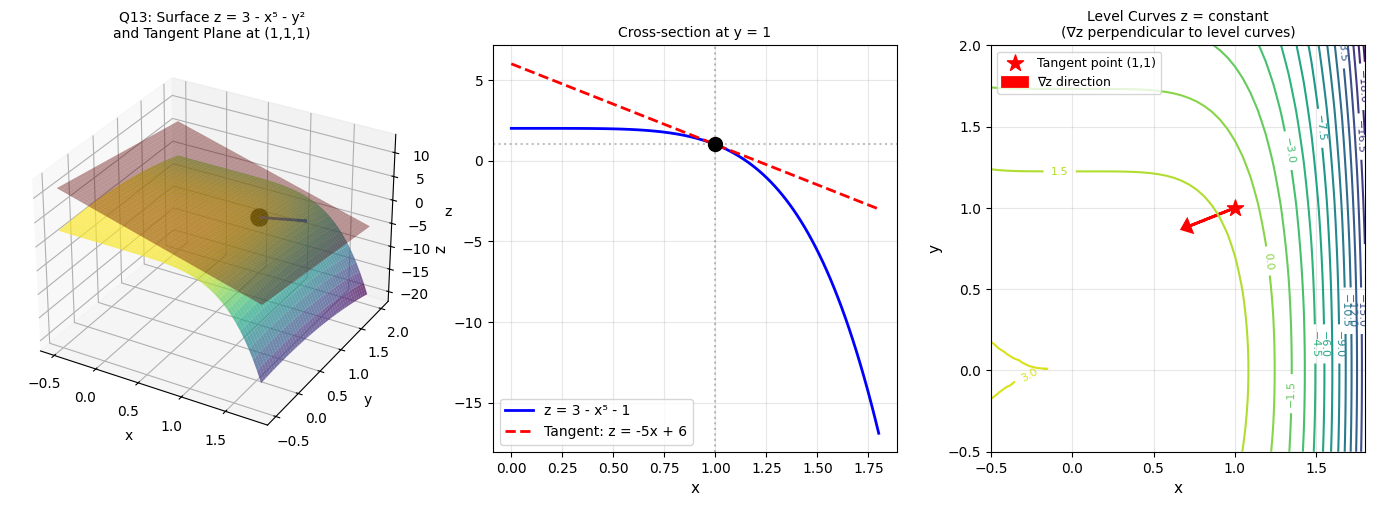


📊 Tangent plane: z = -5x - 2y + 8 (A=-5, B=-2, C=8)


In [226]:
# Visualization: Q13 - Tangent Plane to Surface
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 5))

# Surface: z = 3 - x^5 - y^2
def surface_q13(x, y):
    return 3 - x**5 - y**2

# Tangent plane at (1, 1, 1): z = -5x - 2y + 8
def tangent_plane(x, y):
    return -5*x - 2*y + 8

# Create meshgrid
x_range = np.linspace(-0.5, 1.8, 50)
y_range = np.linspace(-0.5, 2, 50)
X, Y = np.meshgrid(x_range, y_range)
Z_surface = surface_q13(X, Y)
Z_tangent = tangent_plane(X, Y)

# Plot 1: 3D view
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z_surface, cmap='viridis', alpha=0.7)
ax1.plot_surface(X, Y, Z_tangent, color='red', alpha=0.4)
ax1.scatter([1], [1], [1], color='black', s=150, zorder=10, label='Point (1,1,1)')

# Draw normal vector
normal = np.array([5, 2, 1])  # From equation -5x - 2y + z = 8
normal_unit = normal / np.linalg.norm(normal)
ax1.quiver(1, 1, 1, normal_unit[0]*0.5, normal_unit[1]*0.5, normal_unit[2]*0.5, 
           color='blue', linewidth=2, arrow_length_ratio=0.2)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Q13: Surface z = 3 - x⁵ - y²\nand Tangent Plane at (1,1,1)', fontsize=10)

# Plot 2: Cross-section at y=1
ax2 = fig.add_subplot(132)
x_cross = np.linspace(0, 1.8, 100)
z_surface_cross = surface_q13(x_cross, 1)
z_tangent_cross = tangent_plane(x_cross, 1)

ax2.plot(x_cross, z_surface_cross, 'b-', linewidth=2, label='z = 3 - x⁵ - 1')
ax2.plot(x_cross, z_tangent_cross, 'r--', linewidth=2, label='Tangent: z = -5x + 6')
ax2.scatter([1], [1], color='black', s=100, zorder=10)
ax2.axhline(y=1, color='gray', linestyle=':', alpha=0.5)
ax2.axvline(x=1, color='gray', linestyle=':', alpha=0.5)
ax2.set_xlabel('x', fontsize=11)
ax2.set_ylabel('z', fontsize=11)
ax2.set_title('Cross-section at y = 1', fontsize=10)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Contour plot showing level curves
ax3 = fig.add_subplot(133)
contour = ax3.contour(X, Y, Z_surface, levels=15, cmap='viridis')
ax3.clabel(contour, inline=True, fontsize=8)
ax3.scatter([1], [1], color='red', s=150, marker='*', zorder=10, label='Tangent point (1,1)')

# Draw gradient direction at (1,1)
grad = np.array([-5, -2])  # ∂z/∂x = -5, ∂z/∂y = -2 at (1,1)
grad_unit = grad / np.linalg.norm(grad)
ax3.arrow(1, 1, grad_unit[0]*0.3, grad_unit[1]*0.3, head_width=0.08, head_length=0.05, 
          fc='red', ec='red', linewidth=2, label='∇z direction')

ax3.set_xlabel('x', fontsize=11)
ax3.set_ylabel('y', fontsize=11)
ax3.set_title('Level Curves z = constant\n(∇z perpendicular to level curves)', fontsize=10)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')

plt.tight_layout()
plt.show()

print("\n📊 Tangent plane: z = -5x - 2y + 8 (A=-5, B=-2, C=8)")

In [225]:
# Question 14: Tangent line in direction (1,0) passes through (0,1,5)
# Given: f(1,1) = 3, point (0,1,5) on tangent line at (1,1) in direction (1,0)

print("Question 14: Tangent line analysis")
print("=" * 60)
print("Given:")
print("  - f(1, 1) = 3")
print("  - Direction: (1, 0) [x-direction only, y constant]")
print("  - Point on tangent line: (0, 1, 5)")
print()

# The tangent line at (1,1,3) in direction (1,0) is:
# (x, y, z) = (1, 1, 3) + t(1, 0, f_x(1,1))
# where the slope in z-direction is f_x(1,1) since we move in x-direction

print("Tangent line parameterization:")
print("  (x, y, z) = (1, 1, 3) + t(1, 0, f_x(1,1))")
print("  x = 1 + t")
print("  y = 1 (constant, since direction is (1,0))")
print("  z = 3 + t·f_x(1,1)")
print()

# Point (0, 1, 5) lies on this line
# x = 0: 1 + t = 0 → t = -1
# y = 1: ✓ (matches)
# z = 5: 3 + t·f_x(1,1) = 5

print("Finding t from x-coordinate:")
print("  1 + t = 0  →  t = -1")
print()

print("Using z-coordinate to find f_x(1,1):")
print("  3 + t·f_x(1,1) = 5")
print("  3 + (-1)·f_x(1,1) = 5")
print("  -f_x(1,1) = 2")
print("  f_x(1,1) = -2")
print()

fx_value = -2
print(f"✓ Answer: f_x(1,1) = {fx_value}")

Question 14: Tangent line analysis
Given:
  - f(1, 1) = 3
  - Direction: (1, 0) [x-direction only, y constant]
  - Point on tangent line: (0, 1, 5)

Tangent line parameterization:
  (x, y, z) = (1, 1, 3) + t(1, 0, f_x(1,1))
  x = 1 + t
  y = 1 (constant, since direction is (1,0))
  z = 3 + t·f_x(1,1)

Finding t from x-coordinate:
  1 + t = 0  →  t = -1

Using z-coordinate to find f_x(1,1):
  3 + t·f_x(1,1) = 5
  3 + (-1)·f_x(1,1) = 5
  -f_x(1,1) = 2
  f_x(1,1) = -2

✓ Answer: f_x(1,1) = -2


### Answer: $f_x(1, 1) = \boxed{-2}$

**Working:**

The tangent line at $(1, 1, 3)$ in direction $(1, 0)$ has parameterization:
$$(x, y, z) = (1, 1, 3) + t(1, 0, f_x(1,1))$$

Since $(0, 1, 5)$ lies on this line:
- From $x = 0$: $1 + t = 0 \Rightarrow t = -1$
- From $z = 5$: $3 + (-1) \cdot f_x(1,1) = 5 \Rightarrow f_x(1,1) = -2$

---

## Summary of Answers

| Question | Answer |
|----------|--------|
| Q1 | Critical points: $(0,0), (0,2), (1,1)$ |
| Q2 | No tangent plane exists at origin |
| Q3 | 3 correct options (perpendicular to gradient) |
| Q4 | $A + 2B + 4C = 3$ |
| Q5 | Cardinality = 2 |
| Q6 | $\beta = 13/10 = 1.3$ |
| Q7 | Options 1 and 3 correct |
| Q8 | $10Ae = -140/\sqrt{85}$ |
| Q9 | Options 1 and 3 correct |
| Q10 | 0 |
| Q11 | 6 |
| Q12 | 5 |
| Q13 | $C - A - B = 15$ |
| Q14 | $f_x(1,1) = -2$ |

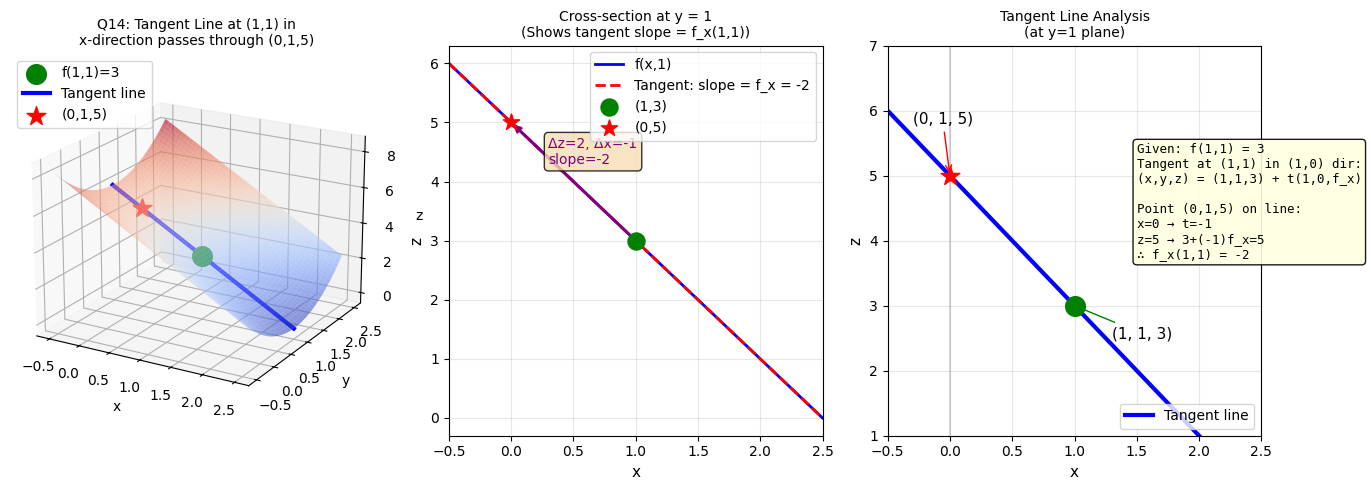


📊 f_x(1,1) = -2 (slope of tangent line in x-direction)


In [229]:
# Visualization: Q14 - Tangent Line in x-direction
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 5))

# Example surface where f(1,1) = 3 and f_x(1,1) = -2
# Use f(x,y) = 3 - 2(x-1) + (y-1)² as an example surface
def surface_q14(x, y):
    return 3 - 2*(x - 1) + (y - 1)**2

# Create meshgrid
x_range = np.linspace(-0.5, 2.5, 50)
y_range = np.linspace(-0.5, 2.5, 50)
X, Y = np.meshgrid(x_range, y_range)
Z_surface = surface_q14(X, Y)

# Plot 1: 3D visualization
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z_surface, cmap='coolwarm', alpha=0.6)

# Point (1, 1, 3)
ax1.scatter([1], [1], [3], color='green', s=200, zorder=10, label='f(1,1)=3')

# Tangent line: (x, y, z) = (1, 1, 3) + t(1, 0, -2)
t_line = np.linspace(-1.5, 1.5, 100)
x_line = 1 + t_line
y_line = np.ones_like(t_line)
z_line = 3 + t_line * (-2)  # f_x(1,1) = -2
ax1.plot(x_line, y_line, z_line, 'b-', linewidth=3, label='Tangent line')

# Point (0, 1, 5) on tangent line
ax1.scatter([0], [1], [5], color='red', s=200, marker='*', zorder=10, label='(0,1,5)')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Q14: Tangent Line at (1,1) in\nx-direction passes through (0,1,5)', fontsize=10)
ax1.legend(loc='upper left')
ax1.view_init(elev=20, azim=-60)

# Plot 2: Cross-section at y=1 (2D view)
ax2 = fig.add_subplot(132)
x_cross = np.linspace(-0.5, 2.5, 100)
z_surface_cross = surface_q14(x_cross, 1)
z_tangent_line = 3 - 2*(x_cross - 1)  # Tangent line at (1,1)

ax2.plot(x_cross, z_surface_cross, 'b-', linewidth=2, label='f(x,1)')
ax2.plot(x_cross, z_tangent_line, 'r--', linewidth=2, label=f'Tangent: slope = f_x = -2')
ax2.scatter([1], [3], color='green', s=150, zorder=10, label='(1,3)')
ax2.scatter([0], [5], color='red', s=150, marker='*', zorder=10, label='(0,5)')

# Show slope calculation
ax2.annotate('', xy=(0, 5), xytext=(1, 3),
            arrowprops=dict(arrowstyle='->', color='purple', lw=2))
ax2.text(0.3, 4.3, 'Δz=2, Δx=-1\nslope=-2', fontsize=10, color='purple',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax2.set_xlabel('x', fontsize=11)
ax2.set_ylabel('z', fontsize=11)
ax2.set_title('Cross-section at y = 1\n(Shows tangent slope = f_x(1,1))', fontsize=10)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 2.5)

# Plot 3: Conceptual diagram
ax3 = fig.add_subplot(133)
ax3.set_xlim(-0.5, 2.5)
ax3.set_ylim(1, 7)

# Draw coordinate system
ax3.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax3.axvline(x=0, color='gray', linestyle='-', alpha=0.3)

# Tangent line
x_tang = np.linspace(-0.5, 2.5, 100)
z_tang = 3 - 2*(x_tang - 1)
ax3.plot(x_tang, z_tang, 'b-', linewidth=3, label='Tangent line')

# Key points
ax3.scatter([1], [3], color='green', s=200, zorder=10)
ax3.scatter([0], [5], color='red', s=200, marker='*', zorder=10)

# Annotations
ax3.annotate('(1, 1, 3)', xy=(1, 3), xytext=(1.3, 2.5),
            fontsize=11, arrowprops=dict(arrowstyle='->', color='green'))
ax3.annotate('(0, 1, 5)', xy=(0, 5), xytext=(-0.3, 5.8),
            fontsize=11, arrowprops=dict(arrowstyle='->', color='red'))

# Show calculation
calc_text = ("Given: f(1,1) = 3\n"
             "Tangent at (1,1) in (1,0) dir:\n"
             "(x,y,z) = (1,1,3) + t(1,0,f_x)\n\n"
             "Point (0,1,5) on line:\n"
             "x=0 → t=-1\n"
             "z=5 → 3+(-1)f_x=5\n"
             "∴ f_x(1,1) = -2")
ax3.text(1.5, 5.5, calc_text, fontsize=9, fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9),
        verticalalignment='top')

ax3.set_xlabel('x', fontsize=11)
ax3.set_ylabel('z', fontsize=11)
ax3.set_title('Tangent Line Analysis\n(at y=1 plane)', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='lower right')

plt.tight_layout()
plt.show()

print("\n📊 f_x(1,1) = -2 (slope of tangent line in x-direction)")